In [5]:
import os
from os.path import join
import copy
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

#import sklearn

import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz, export_text
from IPython.display import Image
# from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
# from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
# from sklearn.metrics import roc_curve, auc, average_precision_score
# from sklearn.metrics import r2_score
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import OrdinalEncoder

In [1]:
#conda remove --force numpy, scipy 

In [3]:
!pip install numpy
!pip install scipy

In [4]:
import sklearn

In [9]:
from scipy.sparse import issparse

In [2]:
data  = pd.read_csv("C:/Users/user/Downloads/BankChurners.csv (1)/BankChurners.csv")

In [3]:
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [4]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [5]:
data.shape

(10127, 21)

In [6]:
# data.info()
# Clientnum 	Num 	Client number. Unique identifier for the customer holding the account
# Attrition_Flag	char	Internal event (customer activity) variable - if the account is closed then 1 else 0
# Customer_Age  	Num 	Demographic variable - Customer's Age in Years
# Gender	Char	Demographic variable - M=Male, F=Female
# Dependent_count	Num 	Demographic variable - Number of dependents
# Education_Level	Char	Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)
# Marital_Status	Char	Demographic variable - Married, Single, Unknown
# Income_Category	Char	Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)
# Card_Category 	Char	Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
# Months_on_book	Num 	Months on book (Time of Relationship)
# Total_Relationship_Count	Num 	Total no. of products held by the customer
# Months_Inactive_12_mon	Num 	No. of months inactive in the last 12 months
# Contacts_Count_12_mon 	Num 	No. of Contacts in the last 12 months
# Credit_Limit  	Num 	Credit Limit on the Credit Card
# Total_Revolving_Bal	Num 	Total Revolving Balance on the Credit Card
# Avg_Open_To_Buy	Num 	Open to Buy Credit Line (Average of last 12 months)
# Total_Amt_Chng_Q4_Q1  	Num 	Change in Transaction Amount (Q4 over Q1) 
# Total_Trans_Amt	Num 	Total Transaction Amount (Last 12 months)
# Total_Trans_Ct	Num 	Total Transaction Count (Last 12 months)
# Total_Ct_Chng_Q4_Q1	Num 	Change in Transaction Count (Q4 over Q1) 
# Avg_Utilization_Ratio 	Num 	Average Card Utilization Ratio

## 문자열 데이터 인코딩진행

In [7]:
#원핫인코딩 진행
data_ohe=pd.get_dummies(data, columns = ['Attrition_Flag','Gender','Marital_Status'], drop_first=True)
data_ohe

,CLIENTNUM,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Existing Customer,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,768805383,45,3,High School,$60K - $80K,Blue,39,5,1,3,...,1.335,1144,42,1.625,0.061,1,1,1,0,0
1,818770008,49,5,Graduate,Less than $40K,Blue,44,6,1,2,...,1.541,1291,33,3.714,0.105,1,0,0,1,0
2,713982108,51,3,Graduate,$80K - $120K,Blue,36,4,1,0,...,2.594,1887,20,2.333,0.000,1,1,1,0,0
3,769911858,40,4,High School,Less than $40K,Blue,34,3,4,1,...,1.405,1171,20,2.333,0.760,1,0,0,0,1
4,709106358,40,3,Uneducated,$60K - $80K,Blue,21,5,1,0,...,2.175,816,28,2.500,0.000,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,2,Graduate,$40K - $60K,Blue,40,3,2,3,...,0.703,15476,117,0.857,0.462,1,1,0,1,0
10123,710638233,41,2,Unknown,$40K - $60K,Blue,25,4,2,3,...,0.804,8764,69,0.683,0.511,0,1,0,0,0
10124,716506083,44,1,High School,Less than $40K,Blue,36,5,3,4,...,0.819,10291,60,0.818,0.000,0,0,1,0,0
10125,717406983,30,2,Graduate,$40K - $60K,Blue,36,4,3,3,...,0.535,8395,62,0.722,0.000,0,1,0,0,1


In [8]:
income_dic = {'Less than $40K' : 0, '$40K - $60K': 1, '$60K - $80K': 2,
              '$80K - $120K':3, '$120K +':4, 'Unknown': 0}
edu_dic = {'Uneducated':0, 'High School':1,'College':2,'Graduate':3,'Post-Graduate':4,
          'Doctorate':5,'Unknown':0}
card_dic={'Blue':0,'Silver':1,'Gold':2,'Platinum':3}

In [9]:
data_ohe['new_income_category'] = data_ohe['Income_Category'].map(income_dic)
data_ohe['new_edu_category'] = data_ohe['Education_Level'].map(edu_dic)
data_ohe['new_card_category'] = data_ohe['Card_Category'].map(card_dic)

In [10]:
FD=data_ohe.drop('Education_Level',axis=1)
FD

,CLIENTNUM,Customer_Age,Dependent_count,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Existing Customer,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
0,768805383,45,3,$60K - $80K,Blue,39,5,1,3,12691.0,...,1.625,0.061,1,1,1,0,0,2,1,0
1,818770008,49,5,Less than $40K,Blue,44,6,1,2,8256.0,...,3.714,0.105,1,0,0,1,0,0,3,0
2,713982108,51,3,$80K - $120K,Blue,36,4,1,0,3418.0,...,2.333,0.000,1,1,1,0,0,3,3,0
3,769911858,40,4,Less than $40K,Blue,34,3,4,1,3313.0,...,2.333,0.760,1,0,0,0,1,0,1,0
4,709106358,40,3,$60K - $80K,Blue,21,5,1,0,4716.0,...,2.500,0.000,1,1,1,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,2,$40K - $60K,Blue,40,3,2,3,4003.0,...,0.857,0.462,1,1,0,1,0,1,3,0
10123,710638233,41,2,$40K - $60K,Blue,25,4,2,3,4277.0,...,0.683,0.511,0,1,0,0,0,1,0,0
10124,716506083,44,1,Less than $40K,Blue,36,5,3,4,5409.0,...,0.818,0.000,0,0,1,0,0,0,1,0
10125,717406983,30,2,$40K - $60K,Blue,36,4,3,3,5281.0,...,0.722,0.000,0,1,0,0,1,1,3,0


In [11]:
FD1=FD.drop('Income_Category',axis=1)#,'Card_Category'
FD1

,CLIENTNUM,Customer_Age,Dependent_count,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Existing Customer,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
0,768805383,45,3,Blue,39,5,1,3,12691.0,777,...,1.625,0.061,1,1,1,0,0,2,1,0
1,818770008,49,5,Blue,44,6,1,2,8256.0,864,...,3.714,0.105,1,0,0,1,0,0,3,0
2,713982108,51,3,Blue,36,4,1,0,3418.0,0,...,2.333,0.000,1,1,1,0,0,3,3,0
3,769911858,40,4,Blue,34,3,4,1,3313.0,2517,...,2.333,0.760,1,0,0,0,1,0,1,0
4,709106358,40,3,Blue,21,5,1,0,4716.0,0,...,2.500,0.000,1,1,1,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,2,Blue,40,3,2,3,4003.0,1851,...,0.857,0.462,1,1,0,1,0,1,3,0
10123,710638233,41,2,Blue,25,4,2,3,4277.0,2186,...,0.683,0.511,0,1,0,0,0,1,0,0
10124,716506083,44,1,Blue,36,5,3,4,5409.0,0,...,0.818,0.000,0,0,1,0,0,0,1,0
10125,717406983,30,2,Blue,36,4,3,3,5281.0,0,...,0.722,0.000,0,1,0,0,1,1,3,0


In [12]:
FD2=FD1.drop('Card_Category',axis=1)
FD2

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Existing Customer,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,...,1.625,0.061,1,1,1,0,0,2,1,0
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,...,3.714,0.105,1,0,0,1,0,0,3,0
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,...,2.333,0.000,1,1,1,0,0,3,3,0
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,...,2.333,0.760,1,0,0,0,1,0,1,0
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,...,2.500,0.000,1,1,1,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,2,40,3,2,3,4003.0,1851,2152.0,...,0.857,0.462,1,1,0,1,0,1,3,0
10123,710638233,41,2,25,4,2,3,4277.0,2186,2091.0,...,0.683,0.511,0,1,0,0,0,1,0,0
10124,716506083,44,1,36,5,3,4,5409.0,0,5409.0,...,0.818,0.000,0,0,1,0,0,0,1,0
10125,717406983,30,2,36,4,3,3,5281.0,0,5281.0,...,0.722,0.000,0,1,0,0,1,1,3,0


In [13]:
Final_clean_data=FD2.drop('CLIENTNUM',axis=1)
Final_clean_data #원핫인코딩 완료

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Existing Customer,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,1.625,0.061,1,1,1,0,0,2,1,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,3.714,0.105,1,0,0,1,0,0,3,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,2.333,0.000,1,1,1,0,0,3,3,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,2.333,0.760,1,0,0,0,1,0,1,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,2.500,0.000,1,1,1,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,...,0.857,0.462,1,1,0,1,0,1,3,0
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,...,0.683,0.511,0,1,0,0,0,1,0,0
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,...,0.818,0.000,0,0,1,0,0,0,1,0
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,...,0.722,0.000,0,1,0,0,1,1,3,0


## 특성(x)과 타겟(y)분리

In [14]:
Final_clean_data.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Attrition_Flag_Existing Customer', 'Gender_M',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'new_income_category', 'new_edu_category',
       'new_card_category'],
      dtype='object')

In [15]:
y = Final_clean_data['Attrition_Flag_Existing Customer']

In [16]:
x = Final_clean_data[['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Gender_M',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'new_income_category', 'new_edu_category',
       'new_card_category']]

## train, test셋 분리

In [17]:
#원본 데이터 모두를 활용한 train, test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)

In [18]:
#x_train.shape

In [19]:
#x_test.shape

In [20]:
#y_train.shape

In [21]:
#y_test.shape

## 스케일링 전처리

In [22]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler()
mms_train = mmscaler.fit(x_train)
mms_train_TF = mmscaler.transform(x_train)
mms_test_TF = mmscaler.transform(x_test)

In [23]:
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()
std_train = stdscaler.fit(x_train)
std_train_TF = stdscaler.transform(x_train)
std_test_TF = stdscaler.transform(x_test)
#pd.DataFrame(std_train_TF, columns=x.columns).head()

In [24]:
from sklearn.preprocessing import RobustScaler
robscaler = RobustScaler()
rob_train = robscaler.fit(x_train)
rob_train_TF = robscaler.transform(x_train)
rob_test_TF = stdscaler.transform(x_test)

In [25]:
from sklearn.preprocessing import Normalizer
norscaler = Normalizer()
nor_train = norscaler.fit(x_train)
nor_train_TF = norscaler.transform(x_train)
nor_test_TF = norscaler.transform(x_test)

In [26]:
from sklearn.preprocessing import MaxAbsScaler
mabscaler = MaxAbsScaler()
mab_train = mabscaler.fit(x_train)
mab_train_TF = mabscaler.transform(x_train)
mab_test_TF = mabscaler.transform(x_test)

In [27]:
#PCA를 위한 전체 x데이터 정규화
x_std_scaled = stdscaler.fit_transform(x)

## PCA

In [28]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(n_components=0.95)
x_reduced=pca.fit_transform(x_std_scaled)

In [30]:
x_reduced

array([[ 0.8994009 , -1.53994793, -1.56617552, ...,  0.27610582,
         1.00306576,  0.22233881],
       [-0.82713296,  0.95160583, -0.96091463, ...,  0.39339661,
         6.17227144,  0.46956227],
       [ 0.28421516, -0.9125707 , -2.28323513, ...,  2.53404092,
        -1.00317317,  1.03739285],
       ...,
       [-0.52785391,  0.0535634 , -0.09453164, ..., -1.23018691,
         0.22746251, -0.2373238 ],
       [ 0.66124749,  0.53156566, -1.12679032, ..., -0.54395302,
         0.65629785,  0.62819312],
       [ 0.34642134,  0.84301952, -1.15088122, ..., -1.5418401 ,
        -0.11064973,  1.09907746]])

In [31]:
#cumsum = np.cumsum(pca.explained_variance_ratio_)

In [32]:
#d=np.argmax(cumsum>=0.95)+1

In [33]:
#pca = PCA(n_components=d)
#x_reduced_nd=pca.fit_transform(x_std_scaled)

In [34]:
x_std_scaled.shape

(10127, 21)

In [35]:
x_reduced.shape

(10127, 15)

In [36]:
#x_reduced_columns=pd.DataFrame(data=x_reduced, index=x_, columns=None, dtype=None, copy=False))

In [37]:
pca.explained_variance_ratio_

array([0.16250672, 0.10412323, 0.08633939, 0.08421376, 0.07226108,
       0.06198274, 0.05454674, 0.05411337, 0.04785553, 0.04717368,
       0.04682976, 0.04303222, 0.03819353, 0.02853813, 0.02514364])

In [38]:
#pca.components_.T

In [39]:
#pca.components_.T.shape

In [40]:
x_pca_train, x_pca_test, y_pca_train, y_pca_test = train_test_split(x_reduced, y, test_size=0.3, stratify=y, random_state=42)

## PCA 시각화

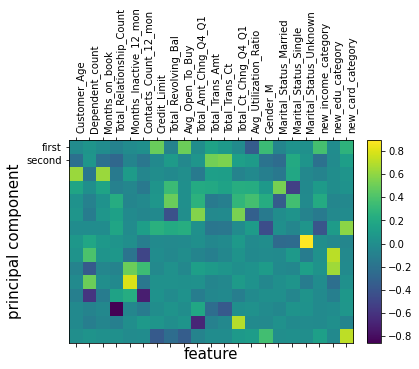

In [41]:
from mpl_toolkits.axes_grid1 import make_axes_locatable



image = plt.matshow(pca.components_, cmap='viridis')

plt.yticks([0, 1], ['first', 'second'])

plt.xticks(range(len(x.columns)), x.columns,

           rotation=90, ha='left')

plt.xlabel('feature', size=15)

plt.ylabel('principal component', size=15)



ax = plt.gca() # GetCurrentAxis

divider = make_axes_locatable(ax)

cax = divider.append_axes('right', size='5%', pad='5%')

plt.colorbar(image, cax=cax)

plt.show()

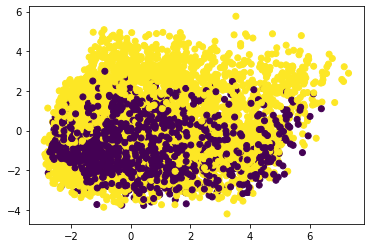

In [42]:
plt.scatter(x_reduced[:, 0], x_reduced[:, 1], c = y)

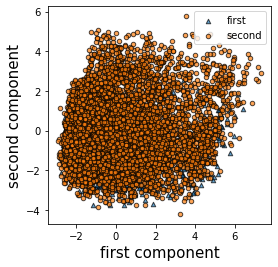

In [43]:
targets = np.unique(y)

markers = ['^', 'o']

for target, marker in zip(targets, markers):

    plt.scatter(x_reduced[y==target][:, 0], x_reduced[y==target][:, 1],

                s=20, alpha=0.7, marker=marker, edgecolors='k')



plt.legend(['first', 'second'], loc=1)

plt.gca().set_aspect('equal') # x축과 y축의 길이를 같게합니다.

plt.xlabel('first component', size=15)

plt.ylabel('second component', size=15)

plt.show()

## 클래스 불균형 확인 후 데이터셋 준비(SMOTE)

In [44]:
# 필요 모듈 임포트
!pip install imbalanced-learn
import imblearn
print(imblearn.__version__)

import pandas as pd
from collections import Counter
from matplotlib import pyplot

0.8.0


In [45]:
# 필요 함수 정의
def count_and_plot(y): 
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
    pyplot.bar(counter.keys(), counter.values())
    pyplot.show()    

Class=1, n=8500 (83.934%)
Class=0, n=1627 (16.066%)


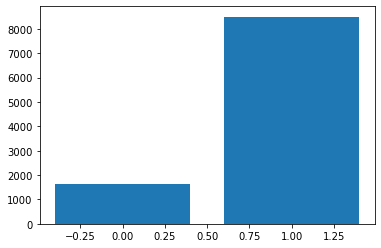

In [46]:
count_and_plot(y)

In [47]:
from imblearn.over_sampling import SMOTE

Class=0, n=5949 (50.000%)
Class=1, n=5949 (50.000%)


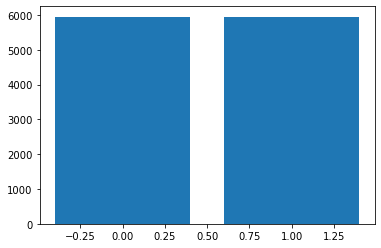

In [48]:
# 훈련 데이터만 오버샘플링
smote_over = SMOTE(k_neighbors=3, random_state = 2019)
x_train_over, y_train_over = smote_over.fit_resample(x_train, y_train)
count_and_plot(y_train_over)

In [49]:
print('원본 데이터의 클래스 비율 \n{}'.format(pd.get_dummies(y).sum()))
print('\nSMOTE 결과 \n{}'.format(pd.get_dummies(y_train_over).sum()))

원본 데이터의 클래스 비율 
0    1627
1    8500
dtype: int64

SMOTE 결과 
0    5949
1    5949
dtype: int64


# 전체 데이터,SMOTE 데이터, PCA 데이터를 비교하며 각각의 모델에서 분석 시작

## 1.로지스틱회귀분석

### 1-1 원본 21개 컬럼을 모두 쓴 TRAIN,TEST 데이터셋

In [50]:
from sklearn.linear_model import LogisticRegression
lgr =LogisticRegression()

In [51]:
lgr.fit(x_train, y_train)

LogisticRegression()

In [52]:
# 계수와 절편을 구해보라.
print(lgr.coef_)
print(lgr.intercept_)

[[-9.65699906e-02 -2.24889040e-01  7.01398390e-02  2.17803269e-01
  -2.83935003e-01 -3.70402112e-01  2.88585296e-04  5.57171947e-04
  -2.68586651e-04  1.64832303e-02 -4.12150897e-04  1.02046153e-01
   6.81052608e-02 -2.43399831e-03  3.74551695e-02  2.97332299e-02
  -5.15510539e-02 -9.25580250e-03  2.49062022e-02 -9.62874547e-02
  -1.43106962e-02]]
[-0.03787262]


In [53]:
# 3. 모델을 테스트셋으로 예측하라.
y_pred = lgr.predict(x_test)
y_prob = lgr.predict_proba(x_test)

In [56]:
print(classification_report(y_pca_test,y_pred))
print('정확도: ',accuracy_score(y_test, y_pred))  #무조건 다수 클래스로 예측하는 경우 정확도
print('재현율: ',recall_score(y_test, y_pred))
print('정밀도: ',precision_score(y_test, y_pred))
print('f1점수: ',f1_score(y_test, y_pred))
print('ROC-AUC점수: ',roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.42      0.52       488
           1       0.90      0.96      0.93      2551

    accuracy                           0.87      3039
   macro avg       0.79      0.69      0.72      3039
weighted avg       0.86      0.87      0.86      3039

정확도:  0.8746298124383021
재현율:  0.9615836926695414
정밀도:  0.8965643274853801
f1점수:  0.9279364478910536
ROC-AUC점수:  0.690832829941328


### 1-2 SMOTE 데이터

In [59]:
lgr.fit(x_train_over, y_train_over)
y_1pred = lgr.predict(x_test)
y_1prob = lgr.predict_proba(x_test)
print(classification_report(y_pca_test,y_1pred))
print('정확도: ',accuracy_score(y_test, y_1pred)) 
print('재현율: ',recall_score(y_test, y_1pred))
print('정밀도: ',precision_score(y_test, y_1pred))
print('f1점수: ',f1_score(y_test, y_1pred))
print('ROC-AUC점수: ',roc_auc_score(y_test, y_1pred))

              precision    recall  f1-score   support

           0       0.42      0.75      0.54       488
           1       0.94      0.81      0.87      2551

    accuracy                           0.80      3039
   macro avg       0.68      0.78      0.71      3039
weighted avg       0.86      0.80      0.82      3039

정확도:  0.7966436327739388
재현율:  0.8055664445315562
정밀도:  0.9439595774000918
f1점수:  0.8692893401015229
ROC-AUC점수:  0.7777832222657781


### 1-3 PCA 데이터

In [60]:
lgr.fit(x_pca_train, y_pca_train)
y_2pred = lgr.predict(x_pca_test)
y_2prob = lgr.predict_proba(x_pca_test)
print(classification_report(y_pca_test,y_2pred))
print('정확도: ',accuracy_score(y_pca_test, y_2pred)) 
print('재현율: ',recall_score(y_pca_test, y_2pred))
print('정밀도: ',precision_score(y_pca_test, y_2pred))
print('f1점수: ',f1_score(y_pca_test, y_2pred))
print('ROC-AUC점수: ',roc_auc_score(y_pca_test, y_2pred))

              precision    recall  f1-score   support

           0       0.74      0.47      0.57       488
           1       0.91      0.97      0.94      2551

    accuracy                           0.89      3039
   macro avg       0.82      0.72      0.75      3039
weighted avg       0.88      0.89      0.88      3039

정확도:  0.8881210924646266
재현율:  0.9682477459819678
정밀도:  0.9050934408208134
f1점수:  0.9356060606060607
ROC-AUC점수:  0.7187550205319675


## 2. KNN

### 1-1 21개 컬럼(원본데이터)

In [62]:
from sklearn.neighbors import KNeighborsClassifier
# k=3으로 인스턴스화 하라 n_neighbors=3
knn_classifier=KNeighborsClassifier(n_neighbors=3)

In [63]:
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [64]:
y_3pred=knn_classifier.predict(x_test)
print(classification_report(y_pca_test,y_3pred))
print('정확도: ',accuracy_score(y_test, y_3pred)) 
print('재현율: ',recall_score(y_test, y_3pred))
print('정밀도: ',precision_score(y_test, y_3pred))
print('f1점수: ',f1_score(y_test, y_3pred))
print('ROC-AUC점수: ',roc_auc_score(y_test, y_3pred))

              precision    recall  f1-score   support

           0       0.71      0.57      0.63       488
           1       0.92      0.95      0.94      2551

    accuracy                           0.89      3039
   macro avg       0.81      0.76      0.78      3039
weighted avg       0.89      0.89      0.89      3039

정확도:  0.8927278710102007
재현율:  0.9549196393571149
정밀도:  0.9202871174914998
f1점수:  0.9372835706040784
ROC-AUC점수:  0.7612712950883935


In [65]:
# 100까지 k 값을 바꾸며 분석 후 시각화
import matplotlib.pyplot as plt

k_list = range(1,11)
acc = [] #정확도를 저장할 리스트 초기화

for k in k_list:
  knn_classifier = KNeighborsClassifier(n_neighbors = k)
  knn_classifier.fit(x_train, y_train)
  acc.append(knn_classifier.score(x_test, y_test)) #시간이 오래걸리면 100에서 줄여가며 해도됨

In [66]:
acc[:10]

[0.8769332017110891,
 0.8558736426456071,
 0.8927278710102007,
 0.8900954261270154,
 0.8986508719973676,
 0.8953603158933859,
 0.8966765383349786,
 0.8976637051661731,
 0.8937150378413952,
 0.8986508719973676]

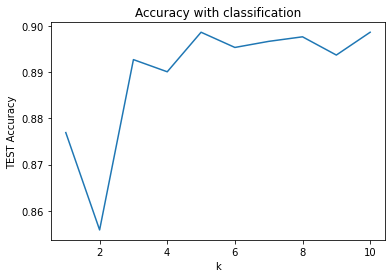

In [67]:
plt.plot(k_list, acc)
plt.xlabel("k")
plt.ylabel("TEST Accuracy")
plt.title("Accuracy with classification")
plt.show()

In [69]:
knn_classifier=KNeighborsClassifier(n_neighbors=10)
knn_classifier.fit(x_train,y_train)
y_4pred=knn_classifier.predict(x_test)
print(classification_report(y_pca_test,y_4pred))
print('정확도: ',accuracy_score(y_test, y_4pred)) 
print('재현율: ',recall_score(y_test, y_4pred))
print('정밀도: ',precision_score(y_test, y_4pred))
print('f1점수: ',f1_score(y_test, y_4pred))
print('ROC-AUC점수: ',roc_auc_score(y_test, y_4pred))

              precision    recall  f1-score   support

           0       0.72      0.60      0.65       488
           1       0.93      0.96      0.94      2551

    accuracy                           0.90      3039
   macro avg       0.82      0.78      0.80      3039
weighted avg       0.89      0.90      0.89      3039

정확도:  0.8986508719973676
재현율:  0.9560956487651902
정밀도:  0.9256166982922202
f1점수:  0.9406093328191285
ROC-AUC점수:  0.7772281522514476


### 2-2 SMOTE 데이터

In [70]:
from sklearn.neighbors import KNeighborsClassifier
# k=3으로 인스턴스화 하라 n_neighbors=3
knn_classifier=KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(x_train_over, y_train_over)

KNeighborsClassifier(n_neighbors=3)

In [71]:
y_5pred=knn_classifier.predict(x_test)
print(classification_report(y_pca_test,y_5pred))
print('정확도: ',accuracy_score(y_test, y_5pred)) 
print('재현율: ',recall_score(y_test, y_5pred))
print('정밀도: ',precision_score(y_test, y_5pred))
print('f1점수: ',f1_score(y_test, y_5pred))
print('ROC-AUC점수: ',roc_auc_score(y_test, y_5pred))

              precision    recall  f1-score   support

           0       0.54      0.74      0.62       488
           1       0.95      0.88      0.91      2551

    accuracy                           0.86      3039
   macro avg       0.74      0.81      0.77      3039
weighted avg       0.88      0.86      0.86      3039

정확도:  0.855544587035209
재현율:  0.8784790278322226
정밀도:  0.9455696202531646
f1점수:  0.9107904897378583
ROC-AUC점수:  0.8070673827685704


In [72]:
import matplotlib.pyplot as plt

k_list = range(1,20)
acc = [] #정확도를 저장할 리스트 초기화

for k in k_list:
  knn_classifier = KNeighborsClassifier(n_neighbors = k)
  knn_classifier.fit(x_train_over, y_train_over)
  acc.append(knn_classifier.score(x_test, y_test))

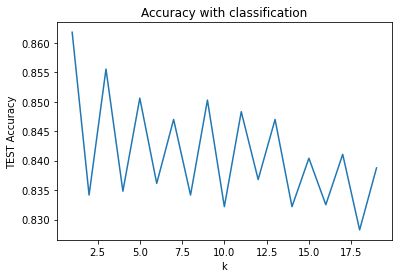

In [73]:
plt.plot(k_list, acc)
plt.xlabel("k")
plt.ylabel("TEST Accuracy")
plt.title("Accuracy with classification")
plt.show()#K를 늘려갈 의미 0

### 2-3 PCA 데이터

In [74]:
knn_classifier=KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(x_pca_train, y_pca_train)

KNeighborsClassifier(n_neighbors=3)

In [75]:
y_6pred=knn_classifier.predict(x_pca_test)
print(classification_report(y_pca_test,y_6pred))

print('정확도: ',accuracy_score(y_pca_test, y_6pred)) 
print('재현율: ',recall_score(y_pca_test, y_6pred))
print('정밀도: ',precision_score(y_pca_test, y_6pred))
print('f1점수: ',f1_score(y_pca_test, y_6pred))
print('ROC-AUC점수: ',roc_auc_score(y_pca_test, y_6pred))

              precision    recall  f1-score   support

           0       0.74      0.50      0.60       488
           1       0.91      0.97      0.94      2551

    accuracy                           0.89      3039
   macro avg       0.83      0.73      0.77      3039
weighted avg       0.88      0.89      0.88      3039

정확도:  0.8923988153998026
재현율:  0.9670717365738926
정밀도:  0.9103321033210332
f1점수:  0.9378445162516632
ROC-AUC점수:  0.7345604584508807


In [76]:
import matplotlib.pyplot as plt

k_list = range(1,20)
acc = [] #정확도를 저장할 리스트 초기화

for k in k_list:
  knn_classifier = KNeighborsClassifier(n_neighbors = k)
  knn_classifier.fit(x_pca_train, y_pca_train)
  acc.append(knn_classifier.score(x_pca_test, y_pca_test))

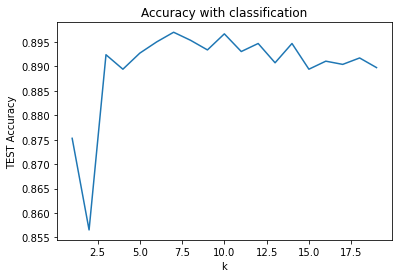

In [77]:
plt.plot(k_list, acc)
plt.xlabel("k")
plt.ylabel("TEST Accuracy")
plt.title("Accuracy with classification")
plt.show()#K를 늘려갈 의미 0

## 3. 나이브베이즈

### 3-1 원본데이터

In [78]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
gnb=GaussianNB()

# 훈련셋으로 모델 훈련하라.(적합화)
gnb.fit(x_train, y_train)

# 테스트셋에 대한 모델 예측
y_7pred=gnb.predict(x_test)
print(classification_report(y_pca_test,y_7pred))

# 정확도를 프린트하라
print('정확도: ',accuracy_score(y_test, y_7pred))  #무조건 다수 클래스로 예측하는 경우 정확도
print('재현율: ',recall_score(y_test, y_7pred))
print('정밀도: ',precision_score(y_test, y_7pred))
print('f1점수: ',f1_score(y_test, y_7pred))
print('ROC-AUC점수: ',roc_auc_score(y_test, y_7pred))

              precision    recall  f1-score   support

           0       0.68      0.58      0.63       488
           1       0.92      0.95      0.93      2551

    accuracy                           0.89      3039
   macro avg       0.80      0.76      0.78      3039
weighted avg       0.88      0.89      0.89      3039

정확도:  0.8887792036854228
재현율:  0.9474715797726382
정밀도:  0.9221671117893934
f1점수:  0.9346481051817478
ROC-AUC점수:  0.764719396443696


In [79]:
Mnb = MultinomialNB()

# 훈련셋으로 모델 훈련하라.(적합화)
Mnb.fit(x_train, y_train)

# 테스트셋에 대한 모델 예측
y_8pred=Mnb.predict(x_test)
print(classification_report(y_pca_test,y_8pred))

# 정확도를 프린트하라
#std,rob 스케일링 안됨
print('정확도: ',accuracy_score(y_test, y_8pred))  #무조건 다수 클래스로 예측하는 경우 정확도
print('재현율: ',recall_score(y_test, y_8pred))
print('정밀도: ',precision_score(y_test, y_8pred))
print('f1점수: ',f1_score(y_test, y_8pred))
print('ROC-AUC점수: ',roc_auc_score(y_test, y_8pred))

              precision    recall  f1-score   support

           0       0.20      0.38      0.26       488
           1       0.86      0.71      0.77      2551

    accuracy                           0.65      3039
   macro avg       0.53      0.54      0.52      3039
weighted avg       0.75      0.65      0.69      3039

정확도:  0.654820664692333
재현율:  0.7079576636613093
정밀도:  0.8559241706161137
f1점수:  0.7749409997854537
ROC-AUC점수:  0.5425034219945891


### 3-2 SMOTE 데이터

In [80]:
gnb=GaussianNB()

# 훈련셋으로 모델 훈련하라.(적합화)
gnb.fit(x_train_over, y_train_over)

# 테스트셋에 대한 모델 예측
y_9pred=gnb.predict(x_test)
print(classification_report(y_pca_test,y_9pred))

# 정확도를 프린트하라
print('정확도: ',accuracy_score(y_test, y_9pred))  #무조건 다수 클래스로 예측하는 경우 정확도
print('재현율: ',recall_score(y_test, y_9pred))
print('정밀도: ',precision_score(y_test, y_9pred))
print('f1점수: ',f1_score(y_test, y_9pred))
print('ROC-AUC점수: ',roc_auc_score(y_test, y_9pred))

              precision    recall  f1-score   support

           0       0.41      0.74      0.53       488
           1       0.94      0.79      0.86      2551

    accuracy                           0.79      3039
   macro avg       0.67      0.77      0.69      3039
weighted avg       0.86      0.79      0.81      3039

정확도:  0.7851266864100033
재현율:  0.7934143473147786
정밀도:  0.9413953488372093
f1점수:  0.8610933843863008
ROC-AUC점수:  0.7676088130016516


In [81]:
Mnb = MultinomialNB()

# 훈련셋으로 모델 훈련하라.(적합화)
Mnb.fit(x_train_over, y_train_over)

# 테스트셋에 대한 모델 예측
y_10pred=Mnb.predict(x_test)
print(classification_report(y_pca_test,y_10pred))

# 정확도를 프린트하라
#std,rob 스케일링 안됨
print('정확도: ',accuracy_score(y_test, y_10pred))  #무조건 다수 클래스로 예측하는 경우 정확도
print('재현율: ',recall_score(y_test, y_10pred))
print('정밀도: ',precision_score(y_test, y_10pred))
print('f1점수: ',f1_score(y_test, y_10pred))
print('ROC-AUC점수: ',roc_auc_score(y_test, y_10pred))

              precision    recall  f1-score   support

           0       0.20      0.38      0.26       488
           1       0.86      0.71      0.77      2551

    accuracy                           0.65      3039
   macro avg       0.53      0.54      0.52      3039
weighted avg       0.75      0.65      0.69      3039

정확도:  0.6544916090819348
재현율:  0.7079576636613093
정밀도:  0.8555187115111321
f1점수:  0.7747747747747747
ROC-AUC점수:  0.5414788318306547


### 3-3 PCA 데이터

In [82]:
gnb=GaussianNB()

# 훈련셋으로 모델 훈련하라.(적합화)
gnb.fit(x_pca_train,y_pca_train)

# 테스트셋에 대한 모델 예측
y_11pred=gnb.predict(x_pca_test)
print(classification_report(y_pca_test,y_11pred))

# 정확도를 프린트하라
print('정확도: ',accuracy_score(y_pca_test, y_11pred))  #무조건 다수 클래스로 예측하는 경우 정확도
print('재현율: ',recall_score(y_pca_test, y_11pred))
print('정밀도: ',precision_score(y_pca_test, y_11pred))
print('f1점수: ',f1_score(y_pca_test, y_11pred))
print('ROC-AUC점수: ',roc_auc_score(y_pca_test, y_11pred))

              precision    recall  f1-score   support

           0       0.82      0.42      0.55       488
           1       0.90      0.98      0.94      2551

    accuracy                           0.89      3039
   macro avg       0.86      0.70      0.75      3039
weighted avg       0.88      0.89      0.88      3039

정확도:  0.8914116485686081
재현율:  0.981967855742846
정밀도:  0.8981713875941197
f1점수:  0.9382022471910113
ROC-AUC점수:  0.700000321314046


In [78]:
# Mnb = MultinomialNB()

# # 훈련셋으로 모델 훈련하라.(적합화)
# Mnb.fit(x_pca_train,y_train)

# # 테스트셋에 대한 모델 예측
# y_pred=Mnb.predict(x_pca_test)

# # 정확도를 프린트하라
# #std,rob 스케일링 안됨
# print('정확도: ',accuracy_score(y_test, y_pred))  #무조건 다수 클래스로 예측하는 경우 정확도
# print('재현율: ',recall_score(y_test, y_pred))
# print('정밀도: ',precision_score(y_test, y_pred))
# print('f1점수: ',f1_score(y_test, y_pred))
# print('ROC-AUC점수: ',roc_auc_score(y_test, y_pred))#x에 음수가 있어서 안된다는 뜻인가...?

## 4.랜덤포레스트

### 4-1 원본데이터

In [84]:
from sklearn.ensemble import RandomForestClassifier
rt = RandomForestClassifier(n_estimators=1000, max_depth=4,random_state=42) 
rt.fit(x_train, y_train)

# 모델 예측
y_12pred=rt.predict(x_test)
y_12proba=rt.predict_proba(x_test)

# 모델 평가
print(classification_report(y_pca_test,y_12pred))

print('정확도: ',accuracy_score(y_test, y_12pred))  #무조건 다수 클래스로 예측하는 경우 정확도
print('재현율: ',recall_score(y_test, y_12pred))
print('정밀도: ',precision_score(y_test, y_12pred))
print('f1점수: ',f1_score(y_test, y_12pred))
print('ROC-AUC점수: ',roc_auc_score(y_test, y_12pred))

columns = x_test.columns
print(columns)

# 특성 중요도  # columns = iris.feature_names임을 상기하라
feature_importance = pd.DataFrame(rt.feature_importances_.reshape((1, -1)), columns=columns, index=['feature_importance'])
feature_importance

              precision    recall  f1-score   support

           0       0.89      0.45      0.59       488
           1       0.90      0.99      0.94      2551

    accuracy                           0.90      3039
   macro avg       0.89      0.72      0.77      3039
weighted avg       0.90      0.90      0.89      3039

정확도:  0.9019414281013491
재현율:  0.9890239121912975
정밀도:  0.9033297529538131
f1점수:  0.9442365269461078
ROC-AUC점수:  0.7178726118333536
Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_M', 'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'new_income_category', 'new_edu_category',
       'new_card_category'],
      dtype='object')


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
feature_importance,0.005795,0.001483,0.003112,0.056788,0.018833,0.026431,0.012599,0.162934,0.008214,0.035797,...,0.212223,0.176888,0.102557,0.005,0.000931,0.00041,0.000054,0.001148,0.00042,0.000638


<AxesSubplot:>

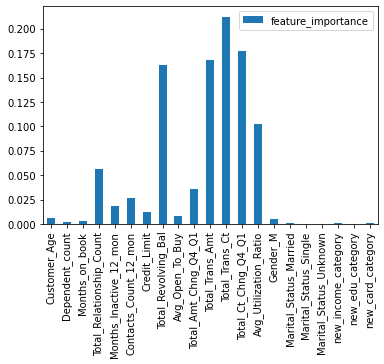

In [85]:
feature_importance.T.plot.bar()

In [86]:
# roc_auc를 계산하라 (곡선 아래 면적)
Q = rt.predict_proba(x_test)[:,1]
roc_auc=roc_auc_score(y_test, Q)
print(roc_auc)

0.9425884095597354


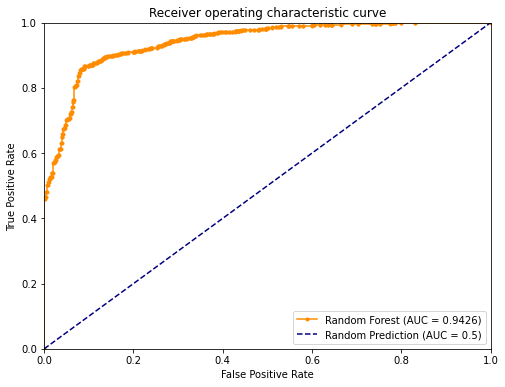

In [87]:
# ROC 곡선과 AUC의 계산
fpr, tpr, _ = roc_curve(y_test, Q)
# 그래프 그리기
plt.figure(figsize=(8,6))      # 그래프 크기 조정
lw = 1.5
plt.plot(fpr, tpr, color='darkorange', marker='.',
         lw=lw, label='Random Forest (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--',
         label='Random Prediction (AUC = 0.5)' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

### 4-2 SMOTE 데이터

In [88]:
rt = RandomForestClassifier(n_estimators=1000, max_depth=4,random_state=42) 
rt.fit(x_train_over, y_train_over)

# 모델 예측
y_13pred=rt.predict(x_test)
y_13proba=rt.predict_proba(x_test)
print(classification_report(y_pca_test,y_13pred))

# 모델 평가
print('정확도: ',accuracy_score(y_test, y_13pred))  #무조건 다수 클래스로 예측하는 경우 정확도
print('재현율: ',recall_score(y_test, y_13pred))
print('정밀도: ',precision_score(y_test, y_13pred))
print('f1점수: ',f1_score(y_test, y_13pred))
print('ROC-AUC점수: ',roc_auc_score(y_test, y_13pred))

columns = x_test.columns
print(columns)

# 특성 중요도  # columns = iris.feature_names임을 상기하라
feature_importance = pd.DataFrame(rt.feature_importances_.reshape((1, -1)), columns=columns, index=['feature_importance'])
feature_importance

              precision    recall  f1-score   support

           0       0.62      0.83      0.71       488
           1       0.96      0.90      0.93      2551

    accuracy                           0.89      3039
   macro avg       0.79      0.86      0.82      3039
weighted avg       0.91      0.89      0.90      3039

정확도:  0.8914116485686081
재현율:  0.9039592316738534
정밀도:  0.9644500209117524
f1점수:  0.9332254148118171
ROC-AUC점수:  0.8648894519025004
Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_M', 'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'new_income_category', 'new_edu_category',
       'new_card_category'],
      dtype='object')


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
feature_importance,0.003759,0.000964,0.001973,0.047839,0.019946,0.007561,0.009069,0.133182,0.010681,0.023277,...,0.259182,0.120582,0.085697,0.021236,0.024623,0.009994,0.001181,0.00129,0.001062,0.000151


<AxesSubplot:>

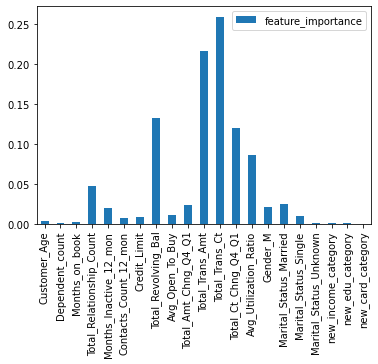

In [89]:
feature_importance.T.plot.bar()

In [85]:
# roc_auc를 계산하라 (곡선 아래 면적)
Q = rt.predict_proba(x_test)[:,1]
roc_auc=roc_auc_score(y_test, Q)
print(roc_auc)

0.9436326802089826


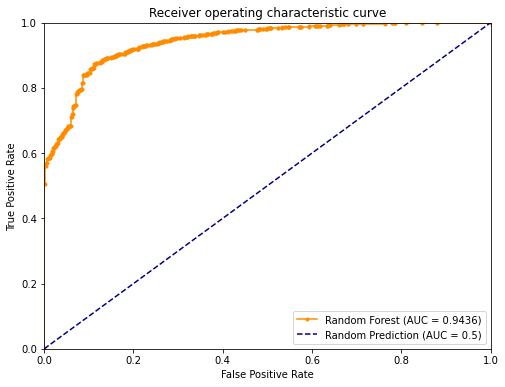

In [86]:
# ROC 곡선과 AUC의 계산
fpr, tpr, _ = roc_curve(y_test, Q)
# 그래프 그리기
plt.figure(figsize=(8,6))      # 그래프 크기 조정
lw = 1.5
plt.plot(fpr, tpr, color='darkorange', marker='.',
         lw=lw, label='Random Forest (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--',
         label='Random Prediction (AUC = 0.5)' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

### 4-3 PCA 데이터

In [87]:
rt = RandomForestClassifier(n_estimators=1000, max_depth=4,random_state=42) 
rt.fit(x_pca_train, y_pca_train)

# 모델 예측
y_14pred=rt.predict(x_pca_test)
y_14proba=rt.predict_proba(x_pca_test)

# 모델 평가
print('정확도: ',accuracy_score(y_pca_test, y_14pred))  #무조건 다수 클래스로 예측하는 경우 정확도
print('재현율: ',recall_score(y_pca_test, y_14pred))
print('정밀도: ',precision_score(y_pca_test, y_14pred))
print('f1점수: ',f1_score(y_pca_test, y_14pred))
print('ROC-AUC점수: ',roc_auc_score(y_pca_test, y_14pred))

정확도:  0.855544587035209
재현율:  0.9992159937279498
정밀도:  0.8536503683858004
f1점수:  0.9207151887303594
ROC-AUC점수:  0.5518620952246307


In [88]:
Q = rt.predict_proba(x_pca_test)[:,1]
roc_auc=roc_auc_score(y_pca_test, Q)
print(roc_auc)

0.8600669297157656


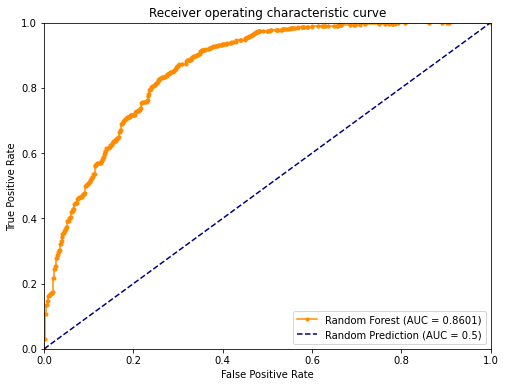

In [89]:
# ROC 곡선과 AUC의 계산
fpr, tpr, _ = roc_curve(y_test, Q)
# 그래프 그리기
plt.figure(figsize=(8,6))      # 그래프 크기 조정
lw = 1.5
plt.plot(fpr, tpr, color='darkorange', marker='.',
         lw=lw, label='Random Forest (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--',
         label='Random Prediction (AUC = 0.5)' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

## 5.서포트벡터머신

### 5-1 원본데이터

In [90]:
from sklearn.svm import SVC

In [91]:
svc = SVC(C = 1.0, kernel = 'rbf')
svc.fit(x_train, y_train) 
y_15pred=svc.predict(x_test)

In [92]:
print('정확도: ',accuracy_score(y_test, y_15pred)) 
print('재현율: ',recall_score(y_test, y_15pred))
print('정밀도: ',precision_score(y_test, y_15pred))
print('f1점수: ',f1_score(y_test, y_15pred))
print('ROC-AUC점수: ',roc_auc_score(y_test, y_15pred))

정확도:  0.8394208621256992
재현율:  1.0
정밀도:  0.8394208621256992
f1점수:  0.9127012522361359
ROC-AUC점수:  0.5


### 5-2 SMOTE 데이터

In [93]:
svc = SVC(C = 1.0, kernel = 'rbf')
svc.fit(x_train_over, y_train_over) 
y_16pred=svc.predict(x_test)

In [94]:
print('정확도: ',accuracy_score(y_test, y_16pred)) 
print('재현율: ',recall_score(y_test, y_16pred))
print('정밀도: ',precision_score(y_test, y_16pred))
print('f1점수: ',f1_score(y_test, y_16pred))
print('ROC-AUC점수: ',roc_auc_score(y_test, y_16pred))

정확도:  0.7308325106943073
재현율:  0.7350058800470404
정밀도:  0.9295984134853743
f1점수:  0.8209281961471103
ROC-AUC점수:  0.7220111367448316


### 5-3 PCA 데이터

In [95]:
svc = SVC(C = 1.0, kernel = 'rbf')
svc.fit(x_pca_train, y_pca_train) 
y_17pred=svc.predict(x_pca_test)

In [96]:
print('정확도: ',accuracy_score(y_pca_test, y_17pred)) 
print('재현율: ',recall_score(y_pca_test, y_17pred))
print('정밀도: ',precision_score(y_pca_test, y_17pred))
print('f1점수: ',f1_score(y_pca_test, y_17pred))
print('ROC-AUC점수: ',roc_auc_score(y_pca_test, y_17pred))

정확도:  0.9072063178677197
재현율:  0.9768718149745198
정밀도:  0.9178637200736648
f1점수:  0.9464489175845042
ROC-AUC점수:  0.759952300929883


## 6. 뉴럴 모델(classifier 예제 보면서 수정해야함) 
참고 : https://machfam.com/16450

### 6-1 원본데이터

In [97]:
import math
from sklearn.metrics import mean_squared_error

from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', 
                    solver='sgd', alpha=0.01, batch_size=32, 
                    learning_rate_init=0.1, max_iter=500)

In [98]:
mlp_clf.fit(x_train, y_train)
y_18pred = mlp_clf.predict(x_test)
print('다중 MLP 회귀, RMSE : {:.4f}'.format(math.sqrt(mean_squared_error(y_test, y_18pred))))

다중 MLP 회귀, RMSE : 0.4007


### 6-2 SMOTE 데이터

In [99]:
mlp_clf.fit(x_train_over, y_train_over)
y_19pred = mlp_clf.predict(x_test)
print('다중 MLP 회귀, RMSE : {:.4f}'.format(math.sqrt(mean_squared_error(y_test, y_19pred))))

다중 MLP 회귀, RMSE : 0.9162


### 6-3 PCA 데이터

In [100]:
mlp_clf.fit(x_pca_train, y_pca_train)
y_19pred = mlp_clf.predict(x_pca_test)
print('다중 MLP 회귀, RMSE : {:.4f}'.format(math.sqrt(mean_squared_error(y_pca_test, y_19pred))))

다중 MLP 회귀, RMSE : 0.2908


## 7. Gradient Boosting Classifier

### 7-1 원본데이터

In [2]:
#https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-15-Gradient-Boost
from sklearn.ensemble import GradientBoostingClassifier
gbmodel = GradientBoostingClassifier(random_state=0,learning_rate=0.15,n_estimators=1000)

gbmodel.fit(x_train,y_train)
y_20pred=gbmodel.predict(x_test)
print(classification_report(y_test,y_20pred))

print('정확도: ',accuracy_score(y_test, y_20pred)) 
print('재현율: ',recall_score(y_test, y_20pred))
print('정밀도: ',precision_score(y_test, y_20pred))
print('f1점수: ',f1_score(y_test, y_20pred))
print('ROC-AUC점수: ',roc_auc_score(y_test, y_20pred))#스케일링 필요없음 ㅇㅇ

columns = x_test.columns
print(columns)

# 특성 중요도  # columns = iris.feature_names임을 상기하라
feature_importance = pd.DataFrame(gbmodel.feature_importances_.reshape((1, -1)), columns=columns, index=['feature_importance'])
print(feature_importance)

NameError: name 'x_train' is not defined

<AxesSubplot:>

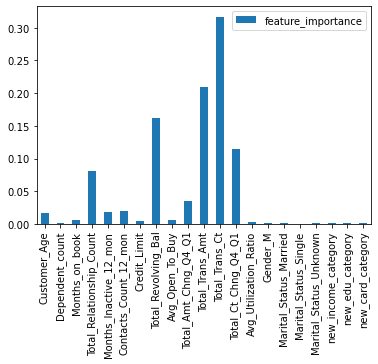

In [102]:
feature_importance.T.plot.bar()

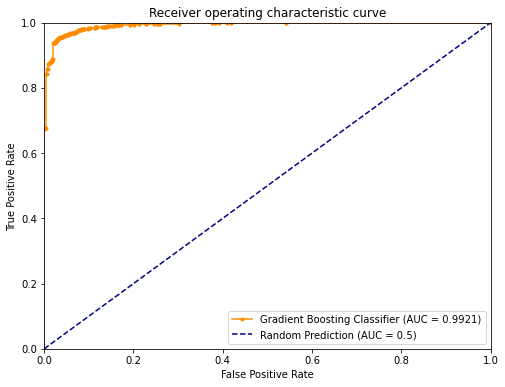

In [103]:
# ROC 곡선과 AUC의 계산
Q = gbmodel.predict_proba(x_test)[:,1]
roc_auc=roc_auc_score(y_test, Q)
fpr, tpr, _ = roc_curve(y_test, Q)
# 그래프 그리기
plt.figure(figsize=(8,6))      # 그래프 크기 조정
lw = 1.5
plt.plot(fpr, tpr, color='darkorange', marker='.',
         lw=lw, label='Gradient Boosting Classifier (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--',
         label='Random Prediction (AUC = 0.5)' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

### 7-2 SMOTE 데이터

In [104]:
gbmodel.fit(x_train_over,y_train_over)
y_21pred=gbmodel.predict(x_test)
print(classification_report(y_test,y_21pred))

print('정확도: ',accuracy_score(y_test, y_21pred)) 
print('재현율: ',recall_score(y_test, y_21pred))
print('정밀도: ',precision_score(y_test, y_21pred))
print('f1점수: ',f1_score(y_test, y_21pred))
print('ROC-AUC점수: ',roc_auc_score(y_test, y_21pred))

columns = x_test.columns
print(columns)

# 특성 중요도  # columns = iris.feature_names임을 상기하라
feature_importance = pd.DataFrame(gbmodel.feature_importances_.reshape((1, -1)), columns=columns, index=['feature_importance'])
print(feature_importance)

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       488
           1       0.98      0.98      0.98      2551

    accuracy                           0.97      3039
   macro avg       0.94      0.94      0.94      3039
weighted avg       0.97      0.97      0.97      3039

정확도:  0.9687397170121751
재현율:  0.9803998431987456
정밀도:  0.9823252160251374
f1점수:  0.9813615852462233
ROC-AUC점수:  0.9440933642223237
Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_M', 'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'new_income_category', 'new_edu_category',
       'new_card_category'],
      dtype='object')
          

<AxesSubplot:>

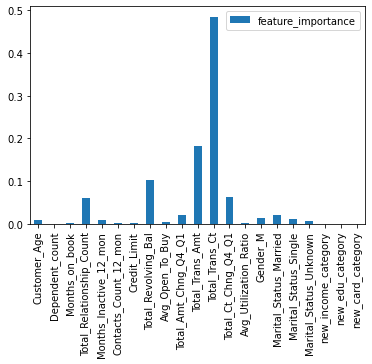

In [105]:
feature_importance.T.plot.bar()

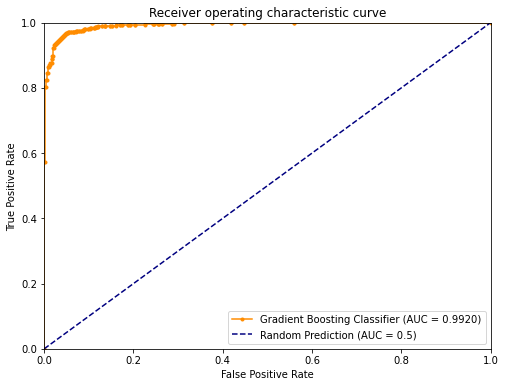

In [106]:
# ROC 곡선과 AUC의 계산
Q = gbmodel.predict_proba(x_test)[:,1]
roc_auc=roc_auc_score(y_test, Q)
fpr, tpr, _ = roc_curve(y_test, Q)
# 그래프 그리기
plt.figure(figsize=(8,6))      # 그래프 크기 조정
lw = 1.5
plt.plot(fpr, tpr, color='darkorange', marker='.',
         lw=lw, label='Gradient Boosting Classifier (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--',
         label='Random Prediction (AUC = 0.5)' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

### 7-3 PCA 데이터

In [107]:
gbmodel.fit(x_pca_train,y_pca_train)
y_22pred=gbmodel.predict(x_pca_test)
print(classification_report(y_pca_test,y_22pred))

print('정확도: ',accuracy_score(y_pca_test, y_22pred)) 
print('재현율: ',recall_score(y_pca_test, y_22pred))
print('정밀도: ',precision_score(y_pca_test, y_22pred))
print('f1점수: ',f1_score(y_pca_test, y_22pred))
print('ROC-AUC점수: ',roc_auc_score(y_pca_test, y_22pred))

              precision    recall  f1-score   support

           0       0.81      0.58      0.68       488
           1       0.92      0.97      0.95      2551

    accuracy                           0.91      3039
   macro avg       0.87      0.78      0.81      3039
weighted avg       0.91      0.91      0.90      3039

정확도:  0.9108259295820994
재현율:  0.973343786750294
정밀도:  0.9244229337304543
f1점수:  0.9482528164979951
ROC-AUC점수:  0.7786800900964586


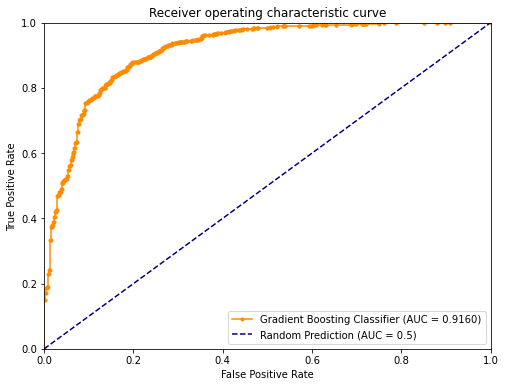

In [108]:
# ROC 곡선과 AUC의 계산
Q = gbmodel.predict_proba(x_pca_test)[:,1]
roc_auc=roc_auc_score(y_test, Q)
fpr, tpr, _ = roc_curve(y_test, Q)
# 그래프 그리기
plt.figure(figsize=(8,6))      # 그래프 크기 조정
lw = 1.5
plt.plot(fpr, tpr, color='darkorange', marker='.',
         lw=lw, label='Gradient Boosting Classifier (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--',
         label='Random Prediction (AUC = 0.5)' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

In [109]:
# catboost

In [110]:
!pip install xgboost

## 8.xgboosting

In [111]:
# 불러오기
from xgboost import plot_importance
from xgboost import XGBClassifier

In [112]:
# 하이퍼 파라미터 참고 : https://lsjsj92.tistory.com/547

### 8-1 전체 데이터

In [113]:
xgb = XGBClassifier(n_estimators=500, learning_rate=1.0, max_depth =4)

In [114]:
xgb.fit(x_train, y_train)
y_23pred = xgb.predict(x_test)

[16:08:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [1]:
print(classification_report(y_pca_test,y_23pred))
print('정확도: ',accuracy_score(y_test, y_23pred)) 
print('재현율: ',recall_score(y_test, y_23pred))
print('정밀도: ',precision_score(y_test, y_23pred))
print('f1점수: ',f1_score(y_test, y_23pred))
print('ROC-AUC점수: ',roc_auc_score(y_test, y_23pred))

NameError: name 'classification_report' is not defined

In [116]:
columns = x_train.columns
feature_importance = pd.DataFrame(xgb.feature_importances_.reshape((1, -1)), columns=columns, index=['feature_importance'])
feature_importance
feature_importance.T.sort_values(by=['feature_importance'], axis=0, ascending=False) 

,feature_importance
Total_Trans_Ct,0.209099
Total_Revolving_Bal,0.141397
Total_Relationship_Count,0.128709
Contacts_Count_12_mon,0.074035
Total_Trans_Amt,0.067559
Total_Ct_Chng_Q4_Q1,0.064305
Months_Inactive_12_mon,0.057600
Marital_Status_Unknown,0.044757
Total_Amt_Chng_Q4_Q1,0.034058
Months_on_book,0.030688


### 8-2 SMOTE 데이터

In [117]:
xgb.fit(x_train_over, y_train_over)
y_24pred = xgb.predict(x_test)

[16:08:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [118]:
print('정확도: ',accuracy_score(y_test, y_24pred)) 
print('재현율: ',recall_score(y_test, y_24pred))
print('정밀도: ',precision_score(y_test, y_24pred))
print('f1점수: ',f1_score(y_test, y_24pred))
print('ROC-AUC점수: ',roc_auc_score(y_test, y_24pred))

정확도:  0.9677525501809806
재현율:  0.9792238337906704
정밀도:  0.982304364923319
f1점수:  0.9807616804083236
ROC-AUC점수:  0.9435053595182861


In [119]:
columns = x_train_over.columns
feature_importance = pd.DataFrame(xgb.feature_importances_.reshape((1, -1)), columns=columns, index=['feature_importance'])
feature_importance
feature_importance.T.sort_values(by=['feature_importance'], axis=0, ascending=False) 

,feature_importance
Total_Trans_Ct,0.245082
Marital_Status_Unknown,0.131835
Total_Relationship_Count,0.097935
Total_Revolving_Bal,0.075929
Marital_Status_Single,0.075821
Marital_Status_Married,0.060295
Gender_M,0.058026
Total_Trans_Amt,0.056284
Months_Inactive_12_mon,0.037649
new_card_category,0.036636


### 8-3 PCA 데이터

In [120]:
xgb.fit(x_pca_train, y_pca_train)
y_25pred = xgb.predict(x_pca_test)

[16:08:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [121]:
print('정확도: ',accuracy_score(y_pca_test, y_25pred)) 
print('재현율: ',recall_score(y_pca_test, y_25pred))
print('정밀도: ',precision_score(y_pca_test, y_25pred))
print('f1점수: ',f1_score(y_pca_test, y_25pred))
print('ROC-AUC점수: ',roc_auc_score(y_pca_test, y_25pred))

정확도:  0.910167818361303
재현율:  0.969031752254018
정밀도:  0.927231807951988
f1점수:  0.9476710753306498
ROC-AUC점수:  0.7857453843237303


In [122]:
!pip install lightgbm

## 9. LightGBM
참고사이트 : https://greatjoy.tistory.com/72
             https://blog.naver.com/PostView.nhn?blogId=good5229&logNo=222131936731&parentCategoryNo=&categoryNo=19&viewDate=&isShowPopularPosts=true&from=search

### 9-1 원본데이터

In [123]:
from lightgbm import LGBMClassifier

In [124]:
lgbm = LGBMClassifier(n_estimators=400)
evals = [(x_test, y_test)]
lgbm.fit(x_train, y_train, early_stopping_rounds=100, eval_metric='logloss',eval_set=evals, verbose=True)
y_26pred = lgbm.predict(x_test)
y_26pred_proba = lgbm.predict_proba(x_test)[:,1]

[1]	valid_0's binary_logloss: 0.377828
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.338259
[3]	valid_0's binary_logloss: 0.307722
[4]	valid_0's binary_logloss: 0.283138
[5]	valid_0's binary_logloss: 0.264168
[6]	valid_0's binary_logloss: 0.247535
[7]	valid_0's binary_logloss: 0.232403
[8]	valid_0's binary_logloss: 0.219198
[9]	valid_0's binary_logloss: 0.208193
[10]	valid_0's binary_logloss: 0.198875
[11]	valid_0's binary_logloss: 0.190187
[12]	valid_0's binary_logloss: 0.18242
[13]	valid_0's binary_logloss: 0.175762
[14]	valid_0's binary_logloss: 0.16933
[15]	valid_0's binary_logloss: 0.163417
[16]	valid_0's binary_logloss: 0.158331
[17]	valid_0's binary_logloss: 0.153401
[18]	valid_0's binary_logloss: 0.149278
[19]	valid_0's binary_logloss: 0.145309
[20]	valid_0's binary_logloss: 0.141815
[21]	valid_0's binary_logloss: 0.137812
[22]	valid_0's binary_logloss: 0.134936
[23]	valid_0's binary_logloss: 0.131752
[24]	valid_0's binary_logloss

In [125]:
print('정확도: ',accuracy_score(y_test, y_26pred)) 
print('재현율: ',recall_score(y_test, y_26pred))
print('정밀도: ',precision_score(y_test, y_26pred))
print('f1점수: ',f1_score(y_test, y_26pred))
print('ROC-AUC점수: ',roc_auc_score(y_test, y_26pred))

정확도:  0.9684106614017769
재현율:  0.9862798902391219
정밀도:  0.9763290648040357
f1점수:  0.9812792511700468
ROC-AUC점수:  0.9306399451195609


In [126]:
columns = x_train.columns
feature_importance = pd.DataFrame(lgbm.feature_importances_.reshape((1, -1)), columns=columns, index=['feature_importance'])
print(feature_importance)
feature_importance.T.sort_values(by=['feature_importance'], axis=0, ascending=False) 

                    Customer_Age  Dependent_count  Months_on_book  \
feature_importance           174               35             134   

                    Total_Relationship_Count  Months_Inactive_12_mon  \
feature_importance                       132                     122   

                    Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
feature_importance                    109           101                  165   

                    Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  ...  \
feature_importance              117                   376  ...   

                    Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
feature_importance             317                  235   

                    Avg_Utilization_Ratio  Gender_M  Marital_Status_Married  \
feature_importance                     52        26                      22   

                    Marital_Status_Single  Marital_Status_Unknown  \
feature_importance                      8                       5   

     

,feature_importance
Total_Trans_Amt,661
Total_Amt_Chng_Q4_Q1,376
Total_Trans_Ct,317
Total_Ct_Chng_Q4_Q1,235
Customer_Age,174
Total_Revolving_Bal,165
Months_on_book,134
Total_Relationship_Count,132
Months_Inactive_12_mon,122
Avg_Open_To_Buy,117


### 9-2 SMOTE 데이터

In [127]:
lgbm = LGBMClassifier(n_estimators=400)
evals = [(x_test, y_test)]
lgbm.fit(x_train_over, y_train_over, early_stopping_rounds=100, eval_metric='logloss',eval_set=evals, verbose=True)
y_27pred = lgbm.predict(x_test)
y_27pred_proba = lgbm.predict_proba(x_test)[:,1]

[1]	valid_0's binary_logloss: 0.619309
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.558382
[3]	valid_0's binary_logloss: 0.507517
[4]	valid_0's binary_logloss: 0.465379
[5]	valid_0's binary_logloss: 0.430046
[6]	valid_0's binary_logloss: 0.39906
[7]	valid_0's binary_logloss: 0.371331
[8]	valid_0's binary_logloss: 0.3485
[9]	valid_0's binary_logloss: 0.32663
[10]	valid_0's binary_logloss: 0.307641
[11]	valid_0's binary_logloss: 0.290377
[12]	valid_0's binary_logloss: 0.275656
[13]	valid_0's binary_logloss: 0.261576
[14]	valid_0's binary_logloss: 0.249083
[15]	valid_0's binary_logloss: 0.237876
[16]	valid_0's binary_logloss: 0.227239
[17]	valid_0's binary_logloss: 0.217888
[18]	valid_0's binary_logloss: 0.209018
[19]	valid_0's binary_logloss: 0.201163
[20]	valid_0's binary_logloss: 0.193001
[21]	valid_0's binary_logloss: 0.186731
[22]	valid_0's binary_logloss: 0.181002
[23]	valid_0's binary_logloss: 0.174534
[24]	valid_0's binary_logloss: 

In [128]:
print('정확도: ',accuracy_score(y_test, y_27pred)) 
print('재현율: ',recall_score(y_test, y_27pred))
print('정밀도: ',precision_score(y_test, y_27pred))
print('f1점수: ',f1_score(y_test, y_27pred))
print('ROC-AUC점수: ',roc_auc_score(y_test, y_27pred))

정확도:  0.9720302731161566
재현율:  0.9807918463347707
정밀도:  0.9858156028368794
f1점수:  0.983297307919041
ROC-AUC점수:  0.953510677265746


In [129]:
columns = x_train_over.columns
feature_importance = pd.DataFrame(lgbm.feature_importances_.reshape((1, -1)), columns=columns, index=['feature_importance'])
feature_importance
feature_importance.T.sort_values(by=['feature_importance'], axis=0, ascending=False) 

,feature_importance
Total_Trans_Amt,752
Total_Trans_Ct,410
Total_Amt_Chng_Q4_Q1,370
Total_Ct_Chng_Q4_Q1,275
Customer_Age,207
Total_Revolving_Bal,194
Total_Relationship_Count,173
Credit_Limit,155
Avg_Open_To_Buy,148
Months_on_book,116


### 9-3 PCA 데이터

In [130]:
lgbm = LGBMClassifier(n_estimators=400)
evals = [(x_pca_test, y_pca_test)]
lgbm.fit(x_pca_train, y_pca_train, early_stopping_rounds=100, eval_metric='logloss',eval_set=evals, verbose=True)
y_28pred = lgbm.predict(x_pca_test)
y_28pred_proba = lgbm.predict_proba(x_pca_test)[:,1]

[1]	valid_0's binary_logloss: 0.406139
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.383291
[3]	valid_0's binary_logloss: 0.365456
[4]	valid_0's binary_logloss: 0.349694
[5]	valid_0's binary_logloss: 0.336436
[6]	valid_0's binary_logloss: 0.32632
[7]	valid_0's binary_logloss: 0.317958
[8]	valid_0's binary_logloss: 0.309849
[9]	valid_0's binary_logloss: 0.302911
[10]	valid_0's binary_logloss: 0.296795
[11]	valid_0's binary_logloss: 0.29064
[12]	valid_0's binary_logloss: 0.285902
[13]	valid_0's binary_logloss: 0.281859
[14]	valid_0's binary_logloss: 0.277415
[15]	valid_0's binary_logloss: 0.2742
[16]	valid_0's binary_logloss: 0.270863
[17]	valid_0's binary_logloss: 0.268487
[18]	valid_0's binary_logloss: 0.266293
[19]	valid_0's binary_logloss: 0.263672
[20]	valid_0's binary_logloss: 0.261319
[21]	valid_0's binary_logloss: 0.260026
[22]	valid_0's binary_logloss: 0.258493
[23]	valid_0's binary_logloss: 0.256743
[24]	valid_0's binary_logloss: 

In [131]:
print('정확도: ',accuracy_score(y_pca_test, y_28pred)) 
print('재현율: ',recall_score(y_pca_test, y_28pred))
print('정밀도: ',precision_score(y_pca_test, y_28pred))
print('f1점수: ',f1_score(y_pca_test, y_28pred))
print('ROC-AUC점수: ',roc_auc_score(y_pca_test, y_28pred))

정확도:  0.9137874300756827
재현율:  0.9741277930223442
정밀도:  0.9268929503916449
f1점수:  0.9499235474006117
ROC-AUC점수:  0.7862442243800245


In [132]:
#columns = x_pca_train.columns
#feature_importance = pd.DataFrame(cbc.feature_importances_.reshape((1, -1)), columns=columns, index=['feature_importance'])
#feature_importance
#feature_importance.T.sort_values(by=['feature_importance'], axis=0, ascending=False) 

## 10.catboost

In [133]:
!pip install catboost

In [134]:
from catboost import CatBoostClassifier, Pool

### 10-1 원본데이터

In [135]:
#iterations=2,depth=2,learning_rate=1,loss_function='Logloss',verbose=True
# train the model
cbc = CatBoostClassifier()

cbc.fit(x_train, y_train)

Learning rate set to 0.023774
0:	learn: 0.6595728	total: 177ms	remaining: 2m 56s
1:	learn: 0.6348705	total: 209ms	remaining: 1m 44s
2:	learn: 0.6052842	total: 217ms	remaining: 1m 12s
3:	learn: 0.5783742	total: 233ms	remaining: 58s
4:	learn: 0.5546333	total: 251ms	remaining: 50s
5:	learn: 0.5333690	total: 256ms	remaining: 42.4s
6:	learn: 0.5109971	total: 261ms	remaining: 37s
7:	learn: 0.4900311	total: 265ms	remaining: 32.9s
8:	learn: 0.4732801	total: 271ms	remaining: 29.9s
9:	learn: 0.4556826	total: 277ms	remaining: 27.4s
10:	learn: 0.4404415	total: 283ms	remaining: 25.5s
11:	learn: 0.4255397	total: 289ms	remaining: 23.8s
12:	learn: 0.4125561	total: 294ms	remaining: 22.3s
13:	learn: 0.3987402	total: 298ms	remaining: 21s
14:	learn: 0.3846787	total: 303ms	remaining: 19.9s
15:	learn: 0.3728016	total: 309ms	remaining: 19s
16:	learn: 0.3613342	total: 315ms	remaining: 18.2s
17:	learn: 0.3509813	total: 321ms	remaining: 17.5s
18:	learn: 0.3444408	total: 328ms	remaining: 17s
19:	learn: 0.3357371

160:	learn: 0.1033973	total: 1.23s	remaining: 6.41s
161:	learn: 0.1030283	total: 1.23s	remaining: 6.38s
162:	learn: 0.1026156	total: 1.24s	remaining: 6.36s
163:	learn: 0.1023787	total: 1.24s	remaining: 6.34s
164:	learn: 0.1020962	total: 1.25s	remaining: 6.32s
165:	learn: 0.1016804	total: 1.25s	remaining: 6.3s
166:	learn: 0.1013951	total: 1.26s	remaining: 6.28s
167:	learn: 0.1010024	total: 1.26s	remaining: 6.27s
168:	learn: 0.1004966	total: 1.27s	remaining: 6.24s
169:	learn: 0.1000492	total: 1.27s	remaining: 6.22s
170:	learn: 0.0998648	total: 1.28s	remaining: 6.2s
171:	learn: 0.0995064	total: 1.28s	remaining: 6.18s
172:	learn: 0.0989635	total: 1.29s	remaining: 6.16s
173:	learn: 0.0983957	total: 1.3s	remaining: 6.15s
174:	learn: 0.0981731	total: 1.3s	remaining: 6.13s
175:	learn: 0.0977723	total: 1.31s	remaining: 6.13s
176:	learn: 0.0975291	total: 1.31s	remaining: 6.12s
177:	learn: 0.0971423	total: 1.32s	remaining: 6.11s
178:	learn: 0.0967642	total: 1.33s	remaining: 6.12s
179:	learn: 0.09

346:	learn: 0.0652926	total: 2.27s	remaining: 4.28s
347:	learn: 0.0651686	total: 2.28s	remaining: 4.27s
348:	learn: 0.0650311	total: 2.28s	remaining: 4.26s
349:	learn: 0.0648956	total: 2.29s	remaining: 4.25s
350:	learn: 0.0647351	total: 2.29s	remaining: 4.24s
351:	learn: 0.0645918	total: 2.3s	remaining: 4.23s
352:	learn: 0.0643991	total: 2.3s	remaining: 4.22s
353:	learn: 0.0642626	total: 2.31s	remaining: 4.21s
354:	learn: 0.0641764	total: 2.31s	remaining: 4.2s
355:	learn: 0.0640373	total: 2.31s	remaining: 4.19s
356:	learn: 0.0639145	total: 2.32s	remaining: 4.18s
357:	learn: 0.0637245	total: 2.32s	remaining: 4.17s
358:	learn: 0.0636347	total: 2.33s	remaining: 4.16s
359:	learn: 0.0635096	total: 2.33s	remaining: 4.15s
360:	learn: 0.0633458	total: 2.34s	remaining: 4.14s
361:	learn: 0.0632592	total: 2.34s	remaining: 4.13s
362:	learn: 0.0631561	total: 2.34s	remaining: 4.12s
363:	learn: 0.0630695	total: 2.35s	remaining: 4.1s
364:	learn: 0.0629538	total: 2.35s	remaining: 4.09s
365:	learn: 0.06

530:	learn: 0.0464037	total: 3.14s	remaining: 2.77s
531:	learn: 0.0463222	total: 3.15s	remaining: 2.77s
532:	learn: 0.0462484	total: 3.15s	remaining: 2.76s
533:	learn: 0.0461646	total: 3.15s	remaining: 2.75s
534:	learn: 0.0461054	total: 3.16s	remaining: 2.75s
535:	learn: 0.0460531	total: 3.16s	remaining: 2.74s
536:	learn: 0.0460001	total: 3.17s	remaining: 2.73s
537:	learn: 0.0459114	total: 3.17s	remaining: 2.72s
538:	learn: 0.0458689	total: 3.18s	remaining: 2.72s
539:	learn: 0.0457937	total: 3.18s	remaining: 2.71s
540:	learn: 0.0457384	total: 3.19s	remaining: 2.7s
541:	learn: 0.0456134	total: 3.19s	remaining: 2.69s
542:	learn: 0.0455531	total: 3.19s	remaining: 2.69s
543:	learn: 0.0454384	total: 3.2s	remaining: 2.68s
544:	learn: 0.0453589	total: 3.2s	remaining: 2.67s
545:	learn: 0.0452554	total: 3.21s	remaining: 2.67s
546:	learn: 0.0451870	total: 3.21s	remaining: 2.66s
547:	learn: 0.0451383	total: 3.21s	remaining: 2.65s
548:	learn: 0.0450748	total: 3.22s	remaining: 2.65s
549:	learn: 0.0

693:	learn: 0.0363761	total: 3.87s	remaining: 1.7s
694:	learn: 0.0362903	total: 3.87s	remaining: 1.7s
695:	learn: 0.0361911	total: 3.88s	remaining: 1.69s
696:	learn: 0.0361233	total: 3.88s	remaining: 1.69s
697:	learn: 0.0360923	total: 3.88s	remaining: 1.68s
698:	learn: 0.0360427	total: 3.89s	remaining: 1.67s
699:	learn: 0.0359947	total: 3.89s	remaining: 1.67s
700:	learn: 0.0359535	total: 3.9s	remaining: 1.66s
701:	learn: 0.0359203	total: 3.9s	remaining: 1.66s
702:	learn: 0.0358725	total: 3.9s	remaining: 1.65s
703:	learn: 0.0358328	total: 3.91s	remaining: 1.64s
704:	learn: 0.0358066	total: 3.91s	remaining: 1.64s
705:	learn: 0.0357450	total: 3.92s	remaining: 1.63s
706:	learn: 0.0356916	total: 3.92s	remaining: 1.63s
707:	learn: 0.0356489	total: 3.93s	remaining: 1.62s
708:	learn: 0.0356033	total: 3.93s	remaining: 1.61s
709:	learn: 0.0355510	total: 3.94s	remaining: 1.61s
710:	learn: 0.0355175	total: 3.94s	remaining: 1.6s
711:	learn: 0.0355010	total: 3.94s	remaining: 1.59s
712:	learn: 0.0354

868:	learn: 0.0289197	total: 4.7s	remaining: 709ms
869:	learn: 0.0289054	total: 4.71s	remaining: 704ms
870:	learn: 0.0288636	total: 4.71s	remaining: 698ms
871:	learn: 0.0288192	total: 4.72s	remaining: 693ms
872:	learn: 0.0287963	total: 4.73s	remaining: 688ms
873:	learn: 0.0287864	total: 4.76s	remaining: 687ms
874:	learn: 0.0287571	total: 4.77s	remaining: 682ms
875:	learn: 0.0287102	total: 4.78s	remaining: 676ms
876:	learn: 0.0286729	total: 4.78s	remaining: 671ms
877:	learn: 0.0286393	total: 4.79s	remaining: 665ms
878:	learn: 0.0286202	total: 4.8s	remaining: 660ms
879:	learn: 0.0285819	total: 4.8s	remaining: 655ms
880:	learn: 0.0285534	total: 4.81s	remaining: 650ms
881:	learn: 0.0284970	total: 4.81s	remaining: 644ms
882:	learn: 0.0284452	total: 4.82s	remaining: 639ms
883:	learn: 0.0283983	total: 4.82s	remaining: 633ms
884:	learn: 0.0283644	total: 4.83s	remaining: 628ms
885:	learn: 0.0283335	total: 4.84s	remaining: 623ms
886:	learn: 0.0283197	total: 4.84s	remaining: 617ms
887:	learn: 0.0

In [136]:
# make the prediction using the resulting model
y_29pred = cbc.predict(x_test)
y_29proba = cbc.predict_proba(x_test)
#print("class = ", cbc_ypred)
#print("proba = ", cbc_yproba)

In [137]:
print('정확도: ',accuracy_score(y_test, y_29pred)) 
print('재현율: ',recall_score(y_test,  y_29pred))
print('정밀도: ',precision_score(y_test,  y_29pred))
print('f1점수: ',f1_score(y_test,  y_29pred))
print('ROC-AUC점수: ',roc_auc_score(y_test, y_29pred))

정확도:  0.9723593287265548
재현율:  0.9890239121912975
정밀도:  0.9782861574253586
f1점수:  0.9836257309941521
ROC-AUC점수:  0.937134906915321


In [138]:
columns = x_train.columns
feature_importance = pd.DataFrame(cbc.feature_importances_.reshape((1, -1)), columns=columns, index=['feature_importance'])
feature_importance

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
feature_importance,2.963646,0.585065,1.704037,4.590578,4.558732,1.942379,3.158538,6.393026,1.98306,7.24525,...,29.489791,5.740284,1.485957,0.766935,0.610979,0.140132,0.065115,0.375284,0.416334,0.101729


In [139]:
feature_importance.T.sort_values(by=['feature_importance'], axis=0, ascending=False)

,feature_importance
Total_Trans_Ct,29.489791
Total_Trans_Amt,25.683147
Total_Amt_Chng_Q4_Q1,7.245250
Total_Revolving_Bal,6.393026
Total_Ct_Chng_Q4_Q1,5.740284
Total_Relationship_Count,4.590578
Months_Inactive_12_mon,4.558732
Credit_Limit,3.158538
Customer_Age,2.963646
Avg_Open_To_Buy,1.983060


In [140]:
def plot_feature_importance(model, x_train, figsize=(12, 6)):

    sns.set_style('darkgrid')

    

    # Plot feature importance

    feature_importance = model.feature_importances_

    feature_importance = 100.0 * (feature_importance / feature_importance.max())

    sorted_idx = np.argsort(feature_importance)

    pos = np.arange(sorted_idx.shape[0]) + .5



    plt.figure(figsize=figsize)

    plt.barh(pos, feature_importance[sorted_idx], align='center')

    plt.yticks(pos, x_train.columns[sorted_idx])

    plt.xlabel('Relative Importance')

    plt.title('Variable Importance')

    plt.show()

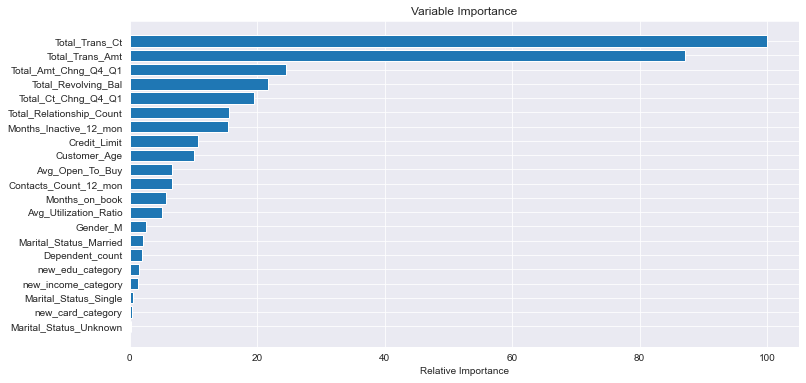

In [141]:
plot_feature_importance(cbc, x_train)

### 10-2 SMOTE 데이터

In [142]:
cbc.fit(x_train_over, y_train_over)

Learning rate set to 0.029659
0:	learn: 0.6536352	total: 5.85ms	remaining: 5.85s
1:	learn: 0.6231086	total: 12.5ms	remaining: 6.25s
2:	learn: 0.5910521	total: 31.6ms	remaining: 10.5s
3:	learn: 0.5595677	total: 38.2ms	remaining: 9.51s
4:	learn: 0.5328082	total: 45.1ms	remaining: 8.97s
5:	learn: 0.5124257	total: 53.3ms	remaining: 8.83s
6:	learn: 0.4880247	total: 59.9ms	remaining: 8.49s
7:	learn: 0.4691789	total: 66.4ms	remaining: 8.23s
8:	learn: 0.4510102	total: 76.7ms	remaining: 8.44s
9:	learn: 0.4349897	total: 91ms	remaining: 9.01s
10:	learn: 0.4206613	total: 98.2ms	remaining: 8.83s
11:	learn: 0.4066756	total: 108ms	remaining: 8.9s
12:	learn: 0.3946505	total: 134ms	remaining: 10.2s
13:	learn: 0.3813057	total: 149ms	remaining: 10.5s
14:	learn: 0.3710637	total: 156ms	remaining: 10.3s
15:	learn: 0.3595355	total: 163ms	remaining: 10s
16:	learn: 0.3511990	total: 169ms	remaining: 9.76s
17:	learn: 0.3421492	total: 175ms	remaining: 9.56s
18:	learn: 0.3348455	total: 182ms	remaining: 9.39s
19:	l

174:	learn: 0.0917104	total: 1.61s	remaining: 7.6s
175:	learn: 0.0914343	total: 1.62s	remaining: 7.58s
176:	learn: 0.0910323	total: 1.63s	remaining: 7.56s
177:	learn: 0.0907579	total: 1.63s	remaining: 7.54s
178:	learn: 0.0904159	total: 1.64s	remaining: 7.52s
179:	learn: 0.0900128	total: 1.65s	remaining: 7.51s
180:	learn: 0.0898400	total: 1.65s	remaining: 7.48s
181:	learn: 0.0896004	total: 1.66s	remaining: 7.46s
182:	learn: 0.0893166	total: 1.67s	remaining: 7.45s
183:	learn: 0.0890852	total: 1.67s	remaining: 7.42s
184:	learn: 0.0887995	total: 1.69s	remaining: 7.46s
185:	learn: 0.0883859	total: 1.71s	remaining: 7.5s
186:	learn: 0.0880211	total: 1.72s	remaining: 7.48s
187:	learn: 0.0875519	total: 1.73s	remaining: 7.46s
188:	learn: 0.0873805	total: 1.73s	remaining: 7.44s
189:	learn: 0.0872060	total: 1.75s	remaining: 7.47s
190:	learn: 0.0868379	total: 1.78s	remaining: 7.56s
191:	learn: 0.0866079	total: 1.79s	remaining: 7.54s
192:	learn: 0.0864134	total: 1.8s	remaining: 7.53s
193:	learn: 0.0

337:	learn: 0.0574291	total: 3.06s	remaining: 6s
338:	learn: 0.0573224	total: 3.07s	remaining: 5.99s
339:	learn: 0.0571527	total: 3.08s	remaining: 5.98s
340:	learn: 0.0570637	total: 3.08s	remaining: 5.96s
341:	learn: 0.0569339	total: 3.09s	remaining: 5.95s
342:	learn: 0.0568364	total: 3.1s	remaining: 5.93s
343:	learn: 0.0567019	total: 3.1s	remaining: 5.92s
344:	learn: 0.0564798	total: 3.11s	remaining: 5.91s
345:	learn: 0.0563804	total: 3.13s	remaining: 5.91s
346:	learn: 0.0562814	total: 3.13s	remaining: 5.9s
347:	learn: 0.0561796	total: 3.14s	remaining: 5.88s
348:	learn: 0.0560856	total: 3.16s	remaining: 5.89s
349:	learn: 0.0559977	total: 3.16s	remaining: 5.88s
350:	learn: 0.0558182	total: 3.17s	remaining: 5.87s
351:	learn: 0.0557270	total: 3.18s	remaining: 5.85s
352:	learn: 0.0555648	total: 3.19s	remaining: 5.84s
353:	learn: 0.0554930	total: 3.19s	remaining: 5.83s
354:	learn: 0.0553609	total: 3.2s	remaining: 5.81s
355:	learn: 0.0552512	total: 3.2s	remaining: 5.8s
356:	learn: 0.0551321

499:	learn: 0.0404691	total: 4.49s	remaining: 4.49s
500:	learn: 0.0404044	total: 4.5s	remaining: 4.48s
501:	learn: 0.0402969	total: 4.51s	remaining: 4.47s
502:	learn: 0.0402125	total: 4.51s	remaining: 4.46s
503:	learn: 0.0401613	total: 4.52s	remaining: 4.45s
504:	learn: 0.0400604	total: 4.53s	remaining: 4.44s
505:	learn: 0.0399641	total: 4.55s	remaining: 4.44s
506:	learn: 0.0398961	total: 4.56s	remaining: 4.44s
507:	learn: 0.0398659	total: 4.59s	remaining: 4.45s
508:	learn: 0.0398056	total: 4.6s	remaining: 4.44s
509:	learn: 0.0397495	total: 4.61s	remaining: 4.42s
510:	learn: 0.0396751	total: 4.61s	remaining: 4.41s
511:	learn: 0.0396403	total: 4.62s	remaining: 4.4s
512:	learn: 0.0395617	total: 4.63s	remaining: 4.39s
513:	learn: 0.0394878	total: 4.64s	remaining: 4.38s
514:	learn: 0.0394514	total: 4.64s	remaining: 4.37s
515:	learn: 0.0393343	total: 4.65s	remaining: 4.36s
516:	learn: 0.0392167	total: 4.67s	remaining: 4.36s
517:	learn: 0.0391659	total: 4.67s	remaining: 4.35s
518:	learn: 0.0

675:	learn: 0.0297790	total: 6.11s	remaining: 2.93s
676:	learn: 0.0296775	total: 6.11s	remaining: 2.92s
677:	learn: 0.0296239	total: 6.12s	remaining: 2.91s
678:	learn: 0.0295798	total: 6.13s	remaining: 2.9s
679:	learn: 0.0295270	total: 6.15s	remaining: 2.89s
680:	learn: 0.0294944	total: 6.15s	remaining: 2.88s
681:	learn: 0.0294554	total: 6.16s	remaining: 2.87s
682:	learn: 0.0293874	total: 6.17s	remaining: 2.86s
683:	learn: 0.0293212	total: 6.17s	remaining: 2.85s
684:	learn: 0.0292570	total: 6.19s	remaining: 2.85s
685:	learn: 0.0292332	total: 6.2s	remaining: 2.84s
686:	learn: 0.0291702	total: 6.2s	remaining: 2.83s
687:	learn: 0.0291048	total: 6.21s	remaining: 2.82s
688:	learn: 0.0290670	total: 6.22s	remaining: 2.81s
689:	learn: 0.0290339	total: 6.22s	remaining: 2.79s
690:	learn: 0.0289700	total: 6.23s	remaining: 2.79s
691:	learn: 0.0288935	total: 6.23s	remaining: 2.77s
692:	learn: 0.0288379	total: 6.25s	remaining: 2.77s
693:	learn: 0.0287975	total: 6.26s	remaining: 2.76s
694:	learn: 0.0

846:	learn: 0.0230497	total: 7.55s	remaining: 1.36s
847:	learn: 0.0230108	total: 7.56s	remaining: 1.35s
848:	learn: 0.0229551	total: 7.56s	remaining: 1.34s
849:	learn: 0.0229046	total: 7.57s	remaining: 1.33s
850:	learn: 0.0228815	total: 7.58s	remaining: 1.33s
851:	learn: 0.0228397	total: 7.58s	remaining: 1.32s
852:	learn: 0.0228099	total: 7.59s	remaining: 1.31s
853:	learn: 0.0227847	total: 7.59s	remaining: 1.3s
854:	learn: 0.0227453	total: 7.6s	remaining: 1.29s
855:	learn: 0.0227203	total: 7.61s	remaining: 1.28s
856:	learn: 0.0226630	total: 7.62s	remaining: 1.27s
857:	learn: 0.0226298	total: 7.62s	remaining: 1.26s
858:	learn: 0.0226017	total: 7.63s	remaining: 1.25s
859:	learn: 0.0225628	total: 7.64s	remaining: 1.24s
860:	learn: 0.0225308	total: 7.64s	remaining: 1.23s
861:	learn: 0.0225058	total: 7.65s	remaining: 1.22s
862:	learn: 0.0224838	total: 7.67s	remaining: 1.22s
863:	learn: 0.0224624	total: 7.68s	remaining: 1.21s
864:	learn: 0.0224381	total: 7.7s	remaining: 1.2s
865:	learn: 0.02

In [143]:
# make the prediction using the resulting model
y_30pred = cbc.predict(x_test)
y_30proba = cbc.predict_proba(x_test)
#print("class = ", cbc_ypred)
#print("proba = ", cbc_yproba)
print('정확도: ',accuracy_score(y_test, y_30pred)) 
print('재현율: ',recall_score(y_test,  y_30pred))
print('정밀도: ',precision_score(y_test,  y_30pred))
print('f1점수: ',f1_score(y_test,  y_30pred))
print('ROC-AUC점수: ',roc_auc_score(y_test, y_30pred))

정확도:  0.9720302731161566
재현율:  0.981967855742846
정밀도:  0.9846698113207547
f1점수:  0.9833169774288517
ROC-AUC점수:  0.9510249114779803


In [144]:
columns = x_train_over.columns
feature_importance = pd.DataFrame(cbc.feature_importances_.reshape((1, -1)), columns=columns, index=['feature_importance'])
feature_importance

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
feature_importance,2.555911,0.637675,1.288039,6.070003,2.106213,1.268808,2.197272,5.814546,1.676123,5.925299,...,28.070032,4.943025,1.570928,1.745564,2.801095,1.794833,0.870281,0.684661,0.679635,0.125987


In [145]:
feature_importance.T.sort_values(by=['feature_importance'], axis=0, ascending=False) 

,feature_importance
Total_Trans_Ct,28.070032
Total_Trans_Amt,27.174073
Total_Relationship_Count,6.070003
Total_Amt_Chng_Q4_Q1,5.925299
Total_Revolving_Bal,5.814546
Total_Ct_Chng_Q4_Q1,4.943025
Marital_Status_Married,2.801095
Customer_Age,2.555911
Credit_Limit,2.197272
Months_Inactive_12_mon,2.106213


### 10-3 PCA 데이터

In [146]:
cbc.fit(x_pca_train, y_pca_train)

Learning rate set to 0.023774
0:	learn: 0.6698569	total: 5.19ms	remaining: 5.19s
1:	learn: 0.6463063	total: 10.4ms	remaining: 5.21s
2:	learn: 0.6241928	total: 15.3ms	remaining: 5.09s
3:	learn: 0.6061526	total: 21.9ms	remaining: 5.45s
4:	learn: 0.5878055	total: 26.9ms	remaining: 5.35s
5:	learn: 0.5711441	total: 32.5ms	remaining: 5.38s
6:	learn: 0.5544666	total: 37.4ms	remaining: 5.3s
7:	learn: 0.5386407	total: 41.9ms	remaining: 5.2s
8:	learn: 0.5262256	total: 46.9ms	remaining: 5.17s
9:	learn: 0.5126667	total: 51.8ms	remaining: 5.12s
10:	learn: 0.5005607	total: 58ms	remaining: 5.21s
11:	learn: 0.4899719	total: 62.5ms	remaining: 5.15s
12:	learn: 0.4776365	total: 67.5ms	remaining: 5.13s
13:	learn: 0.4690989	total: 72.2ms	remaining: 5.08s
14:	learn: 0.4582744	total: 76.8ms	remaining: 5.04s
15:	learn: 0.4477652	total: 81.6ms	remaining: 5.02s
16:	learn: 0.4378198	total: 86.6ms	remaining: 5.01s
17:	learn: 0.4291050	total: 91.2ms	remaining: 4.98s
18:	learn: 0.4206303	total: 95.9ms	remaining: 4.

166:	learn: 0.2231349	total: 858ms	remaining: 4.28s
167:	learn: 0.2228342	total: 863ms	remaining: 4.27s
168:	learn: 0.2225388	total: 867ms	remaining: 4.26s
169:	learn: 0.2220737	total: 872ms	remaining: 4.26s
170:	learn: 0.2217297	total: 877ms	remaining: 4.25s
171:	learn: 0.2214171	total: 882ms	remaining: 4.25s
172:	learn: 0.2210163	total: 887ms	remaining: 4.24s
173:	learn: 0.2207904	total: 892ms	remaining: 4.23s
174:	learn: 0.2204395	total: 896ms	remaining: 4.22s
175:	learn: 0.2201426	total: 902ms	remaining: 4.22s
176:	learn: 0.2199126	total: 906ms	remaining: 4.21s
177:	learn: 0.2195901	total: 911ms	remaining: 4.21s
178:	learn: 0.2192795	total: 916ms	remaining: 4.2s
179:	learn: 0.2190696	total: 921ms	remaining: 4.2s
180:	learn: 0.2186792	total: 926ms	remaining: 4.19s
181:	learn: 0.2183597	total: 930ms	remaining: 4.18s
182:	learn: 0.2179188	total: 935ms	remaining: 4.17s
183:	learn: 0.2176755	total: 940ms	remaining: 4.17s
184:	learn: 0.2173067	total: 945ms	remaining: 4.16s
185:	learn: 0.

347:	learn: 0.1770257	total: 1.73s	remaining: 3.23s
348:	learn: 0.1768641	total: 1.73s	remaining: 3.23s
349:	learn: 0.1766730	total: 1.74s	remaining: 3.22s
350:	learn: 0.1765134	total: 1.74s	remaining: 3.22s
351:	learn: 0.1763290	total: 1.75s	remaining: 3.21s
352:	learn: 0.1761336	total: 1.75s	remaining: 3.21s
353:	learn: 0.1759020	total: 1.75s	remaining: 3.2s
354:	learn: 0.1756398	total: 1.76s	remaining: 3.2s
355:	learn: 0.1754098	total: 1.76s	remaining: 3.19s
356:	learn: 0.1751884	total: 1.77s	remaining: 3.19s
357:	learn: 0.1750117	total: 1.77s	remaining: 3.18s
358:	learn: 0.1748274	total: 1.78s	remaining: 3.17s
359:	learn: 0.1745996	total: 1.78s	remaining: 3.17s
360:	learn: 0.1744755	total: 1.79s	remaining: 3.17s
361:	learn: 0.1743528	total: 1.79s	remaining: 3.16s
362:	learn: 0.1741584	total: 1.8s	remaining: 3.15s
363:	learn: 0.1738808	total: 1.8s	remaining: 3.15s
364:	learn: 0.1736572	total: 1.81s	remaining: 3.14s
365:	learn: 0.1733893	total: 1.81s	remaining: 3.14s
366:	learn: 0.17

517:	learn: 0.1485386	total: 2.66s	remaining: 2.47s
518:	learn: 0.1484392	total: 2.66s	remaining: 2.47s
519:	learn: 0.1482595	total: 2.67s	remaining: 2.46s
520:	learn: 0.1481143	total: 2.67s	remaining: 2.46s
521:	learn: 0.1479412	total: 2.68s	remaining: 2.45s
522:	learn: 0.1478707	total: 2.68s	remaining: 2.44s
523:	learn: 0.1476799	total: 2.69s	remaining: 2.44s
524:	learn: 0.1474968	total: 2.69s	remaining: 2.43s
525:	learn: 0.1473471	total: 2.7s	remaining: 2.43s
526:	learn: 0.1472059	total: 2.7s	remaining: 2.42s
527:	learn: 0.1470366	total: 2.71s	remaining: 2.42s
528:	learn: 0.1468604	total: 2.71s	remaining: 2.41s
529:	learn: 0.1467307	total: 2.71s	remaining: 2.41s
530:	learn: 0.1466336	total: 2.72s	remaining: 2.4s
531:	learn: 0.1465439	total: 2.73s	remaining: 2.4s
532:	learn: 0.1463688	total: 2.73s	remaining: 2.39s
533:	learn: 0.1461738	total: 2.73s	remaining: 2.39s
534:	learn: 0.1460549	total: 2.74s	remaining: 2.38s
535:	learn: 0.1459657	total: 2.74s	remaining: 2.38s
536:	learn: 0.14

686:	learn: 0.1267644	total: 3.52s	remaining: 1.61s
687:	learn: 0.1266288	total: 3.53s	remaining: 1.6s
688:	learn: 0.1264964	total: 3.54s	remaining: 1.6s
689:	learn: 0.1263770	total: 3.54s	remaining: 1.59s
690:	learn: 0.1263082	total: 3.55s	remaining: 1.59s
691:	learn: 0.1262319	total: 3.55s	remaining: 1.58s
692:	learn: 0.1260938	total: 3.56s	remaining: 1.58s
693:	learn: 0.1260060	total: 3.56s	remaining: 1.57s
694:	learn: 0.1258671	total: 3.57s	remaining: 1.57s
695:	learn: 0.1257560	total: 3.57s	remaining: 1.56s
696:	learn: 0.1256748	total: 3.58s	remaining: 1.56s
697:	learn: 0.1256449	total: 3.58s	remaining: 1.55s
698:	learn: 0.1255562	total: 3.59s	remaining: 1.55s
699:	learn: 0.1254928	total: 3.6s	remaining: 1.54s
700:	learn: 0.1253715	total: 3.6s	remaining: 1.54s
701:	learn: 0.1252586	total: 3.61s	remaining: 1.53s
702:	learn: 0.1251169	total: 3.61s	remaining: 1.53s
703:	learn: 0.1250323	total: 3.62s	remaining: 1.52s
704:	learn: 0.1249357	total: 3.62s	remaining: 1.51s
705:	learn: 0.12

854:	learn: 0.1099274	total: 4.52s	remaining: 766ms
855:	learn: 0.1097761	total: 4.52s	remaining: 761ms
856:	learn: 0.1096515	total: 4.53s	remaining: 756ms
857:	learn: 0.1095858	total: 4.53s	remaining: 750ms
858:	learn: 0.1094279	total: 4.54s	remaining: 745ms
859:	learn: 0.1093100	total: 4.54s	remaining: 740ms
860:	learn: 0.1092395	total: 4.55s	remaining: 734ms
861:	learn: 0.1091059	total: 4.55s	remaining: 729ms
862:	learn: 0.1089822	total: 4.56s	remaining: 723ms
863:	learn: 0.1088842	total: 4.56s	remaining: 718ms
864:	learn: 0.1087922	total: 4.57s	remaining: 713ms
865:	learn: 0.1087578	total: 4.57s	remaining: 708ms
866:	learn: 0.1086929	total: 4.58s	remaining: 702ms
867:	learn: 0.1086213	total: 4.58s	remaining: 697ms
868:	learn: 0.1085027	total: 4.59s	remaining: 692ms
869:	learn: 0.1084706	total: 4.59s	remaining: 686ms
870:	learn: 0.1083248	total: 4.6s	remaining: 681ms
871:	learn: 0.1081986	total: 4.6s	remaining: 676ms
872:	learn: 0.1081086	total: 4.61s	remaining: 670ms
873:	learn: 0.

In [147]:
# make the prediction using the resulting model
y_31pred = cbc.predict(x_pca_test)
y_31proba = cbc.predict_proba(x_pca_test)
#print("class = ", cbc_ypred)
#print("proba = ", cbc_yproba)
print('정확도: ',accuracy_score(y_pca_test, y_31pred)) 
print('재현율: ',recall_score(y_pca_test,  y_31pred))
print('정밀도: ',precision_score(y_pca_test,  y_31pred))
print('f1점수: ',f1_score(y_pca_test,  y_31pred))
print('ROC-AUC점수: ',roc_auc_score(y_pca_test, y_31pred))

정확도:  0.9147745969068772
재현율:  0.9760878087024696
정밀도:  0.9263392857142857
f1점수:  0.9505630845581219
ROC-AUC점수:  0.7851750518922184


In [148]:
#columns = x_pca_train.columns
#feature_importance = pd.DataFrame(cbc.feature_importances_.reshape((1, -1)), columns=columns, index=['feature_importance'])
#feature_importance
#feature_importance.T.sort_values(by=['feature_importance'], axis=0, ascending=False) 

In [149]:
#feature_importance.T.sort_values(by=['feature_importance'], axis=0, ascending=False) 

## 11. 특성 컬럼을 활용한 클러스터링

In [150]:
# 라이브러리 불러오기

import os

import pandas as pd
import numpy as np

# 그래프 패키지
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as clrs

# Kmeans 알고리즘을 scikit-learn에서 불러온다.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

### 11-1 EDA

In [151]:
# 요약 통계량 출력
print("\nSummary statistics\n", x.describe())


Summary statistics
        Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
ma

In [152]:
print("\nCorrelation matrix\n", x.corr())


Correlation matrix
                           Customer_Age  Dependent_count  Months_on_book  \
Customer_Age                  1.000000        -0.122254        0.788912   
Dependent_count              -0.122254         1.000000       -0.103062   
Months_on_book                0.788912        -0.103062        1.000000   
Total_Relationship_Count     -0.010931        -0.039076       -0.009203   
Months_Inactive_12_mon        0.054361        -0.010768        0.074164   
Contacts_Count_12_mon        -0.018452        -0.040505       -0.010774   
Credit_Limit                  0.002476         0.068065        0.007507   
Total_Revolving_Bal           0.014780        -0.002688        0.008623   
Avg_Open_To_Buy               0.001151         0.068291        0.006732   
Total_Amt_Chng_Q4_Q1         -0.062042        -0.035439       -0.048959   
Total_Trans_Amt              -0.046446         0.025046       -0.038591   
Total_Trans_Ct               -0.067097         0.049912       -0.049819   
Tota

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
corr = x.corr(method = 'pearson')

In [155]:
#피어슨의 상관계수는 일반적으로,

#  값이 -1.0 ~ -0.7 이면, 강한 음적 상관관계

#  값이 -0.7 ~ -0.3 이면, 뚜렷한 음적 상관관계

#  값이 -0.3 ~ -0.1 이면, 약한 음적 상관관계

#  값이 -0.1 ~ +0.1 이면, 없다고 할 수 있는 상관관계

#  값이 +0.1 ~ +0.3 이면, 약한 양적 상관관계

#  값이 +0.3 ~ +0.7 이면, 뚜렷한 양적 상관관계

#  값이 +0.7 ~ +1.0 이면, 강한 양적 상관관계로 해석됩니다.
#https://www.codeit.kr/community/threads/8594
#https://sno-machinelearning.tistory.com/68

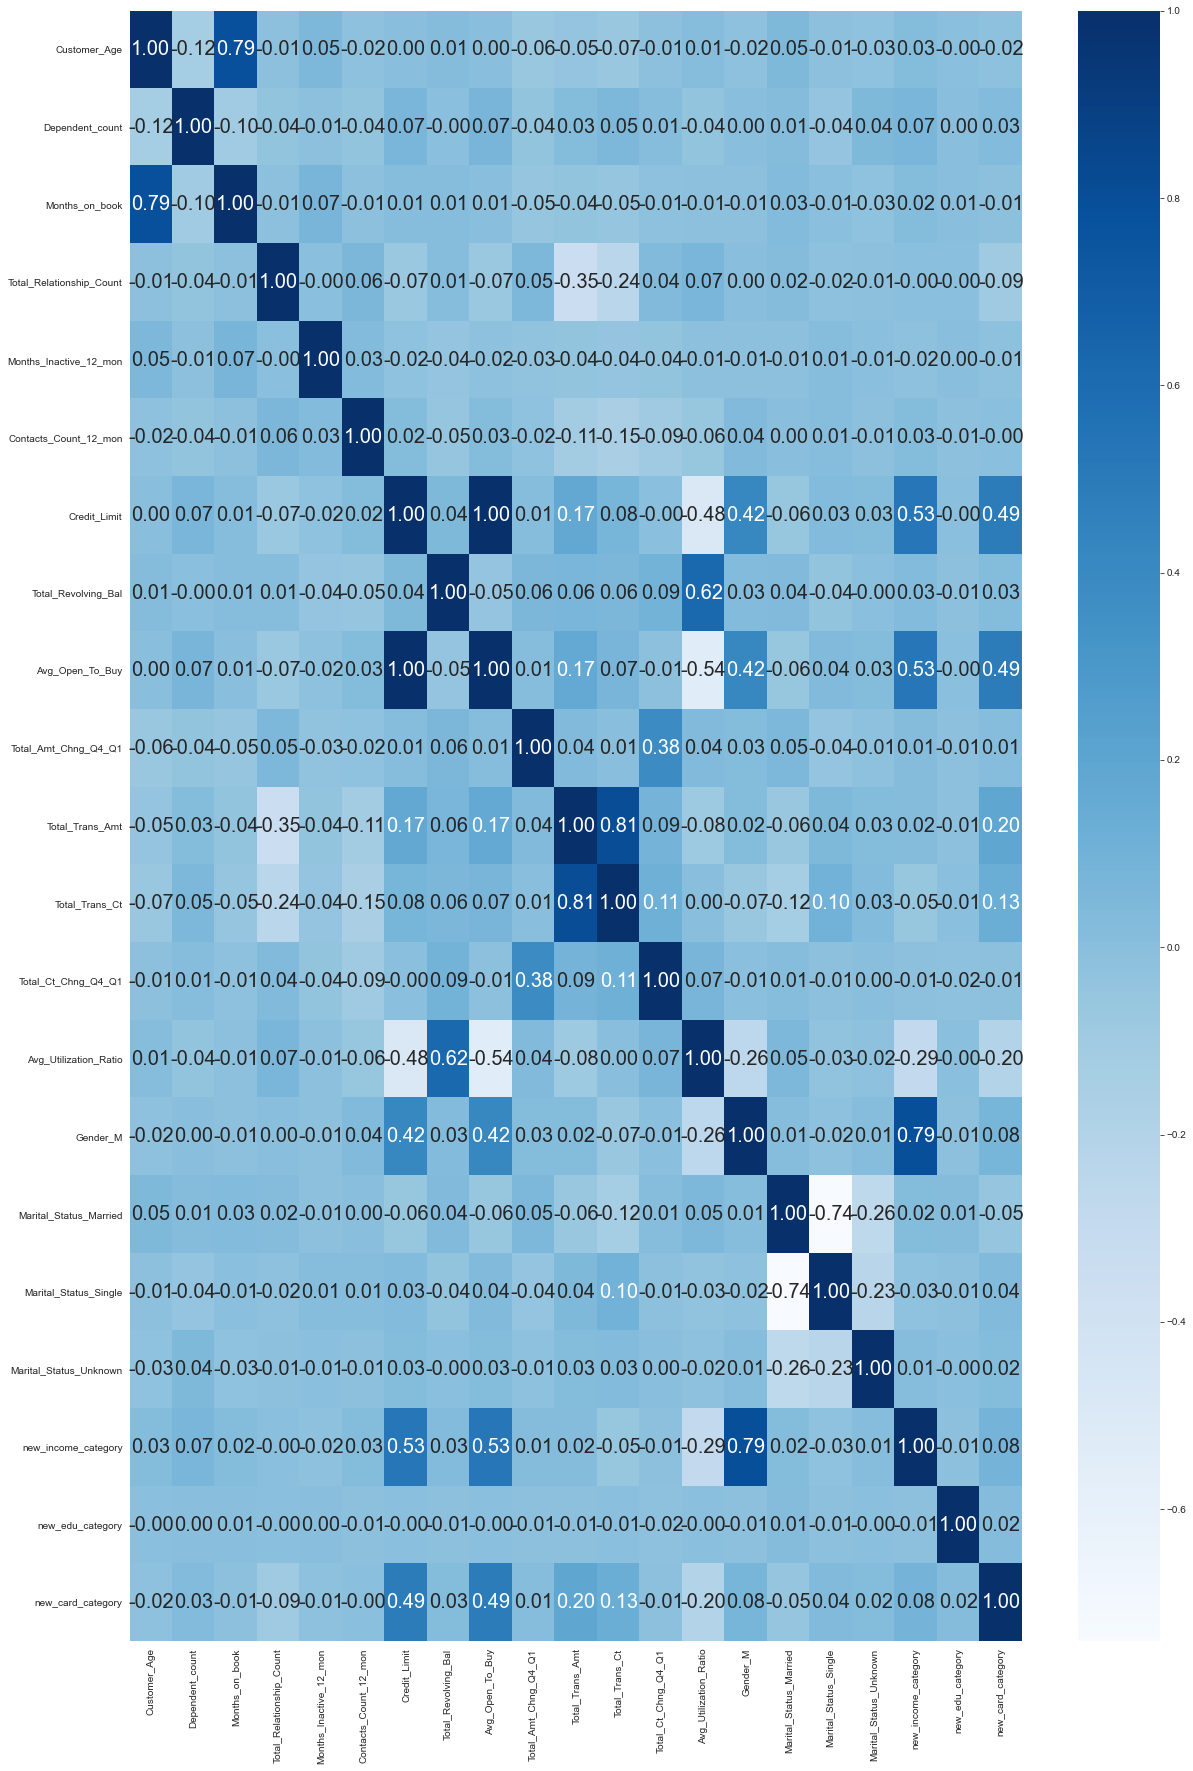

In [156]:
plt.figure(figsize=(20,30))

x_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '.2f', square = False, cmap = 'Blues')

In [157]:
#cbar는 오른쪽에 있는 막대(범주)를 표시하는 것입니다.

#annot는 상관계수를 표시합니다.

#annot_kws는 상관계수의 글자 크기를 지정합니다.

#fmt 는 상관계수의 소수점 자리수를 지정합니다.

#square는 정사각형으로 지정하는 것이며, False로 설정 시 직사각형이 됩니다.

#cmap은 색상을 지정합니다.

## 히스토그램 플로팅(상위 4개만 표시)

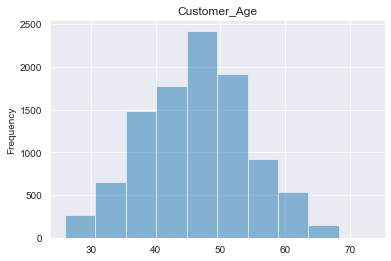

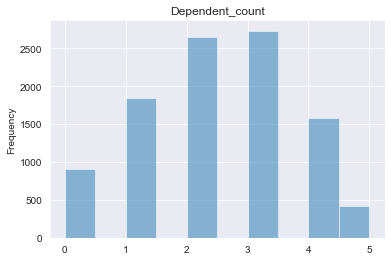

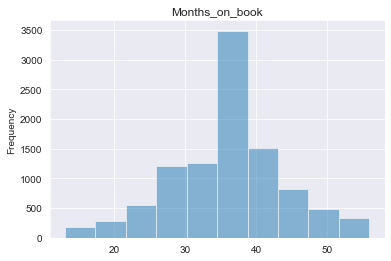

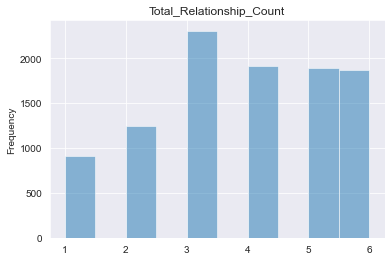

In [158]:
# 히스토그램 그리기
plt.figure(1)
x['Customer_Age'].plot(kind = 'hist', title = 'Customer_Age', alpha = 0.5)

plt.figure(2)
x['Dependent_count'].plot(kind = 'hist', title = 'Dependent_count', alpha = 0.5)

plt.figure(3)
x['Months_on_book'].plot(kind = 'hist', title = 'Months_on_book', alpha = 0.5)

plt.figure(4)
x['Total_Relationship_Count'].plot(kind = 'hist', title = 'Total_Relationship_Count', alpha = 0.5)

plt.show()

## k-means 군집화(응집형)

In [159]:
# K평균을 이용해 3개의 군집을 만들어보자. 
# 함수이름은 KMeans이고 n_clusters를 이용해 군집 수 지정
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)

In [160]:
pca = PCA(n_components=15)
x_reduced15=pca.fit_transform(x_std_scaled)

In [161]:
km.fit(x_reduced15)
cluster=km.predict(x_reduced15)

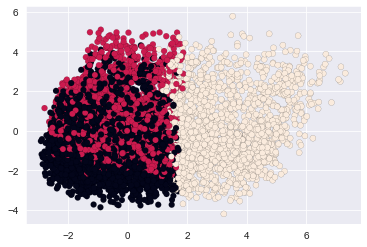

In [162]:
plt.scatter(x_reduced15[:,0], x_reduced15[:,1], c=cluster, linewidth=0.1, edgecolor='black')
plt.show()

### single linkage

In [163]:
from sklearn.cluster import AgglomerativeClustering
single_clustering = AgglomerativeClustering(linkage='single', n_clusters=3)

In [164]:
single_clustering.fit(x_reduced15)

AgglomerativeClustering(linkage='single', n_clusters=3)

In [165]:
single_cluster = single_clustering.labels_
single_cluster

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

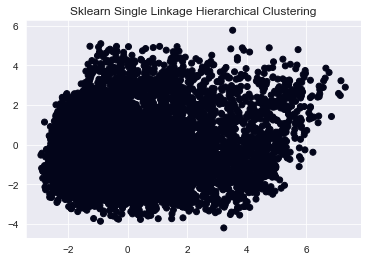

In [166]:
plt.scatter(x_reduced15[:,0], x_reduced15[:,1], c=single_cluster)
plt.title('Sklearn Single Linkage Hierarchical Clustering')
plt.show()